In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

%matplotlib inline
pd.set_option('max_colwidth',1000)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# Load the loan data
df = pd.read_pickle('data_cleaned.pkl')
df.reset_index(drop=True, inplace=True)

In [3]:
# Encode the loan_status to numerical values
# Fully Paid = 1
# Charged Off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: int(x == 'Fully Paid'))

"""
loan_status = df['loan_status']
df = df.drop('loan_status', axis=1)
"""

"\nloan_status = df['loan_status']\ndf = df.drop('loan_status', axis=1)\n"

In [4]:
# Categorical df from data-cleanup.ipynb
# Categorical df 
"""
cat_features = df.select_dtypes(include=['object']).columns
print(cat_features)

for y in cat_features:
    # print(y + " has " + str(len(df[y].unique())) + " unique values")
    df = df.join(pd.get_dummies(df[y], prefix=y))
    df.drop(y, axis=1, inplace=True)
"""

# Remove int_rate also
df.drop('int_rate', axis=1, inplace=True)



In [5]:
# Renaming some column names
"""
df.rename(columns = {'emp_length_<1':'emp_length_less_than_1'}, inplace = True)
"""

df.describe()

loan_amnt    funded_amnt  funded_amnt_inv           term  \
count  810576.000000  810576.000000    810576.000000  810576.000000   
mean    14301.585200   14288.145066     14255.991260      41.784302   
std      8491.750372    8484.975771      8490.013028      10.264756   
min       500.000000     500.000000         0.000000      36.000000   
25%      8000.000000    8000.000000      7975.000000      36.000000   
50%     12000.000000   12000.000000     12000.000000      36.000000   
75%     20000.000000   20000.000000     20000.000000      36.000000   
max     40000.000000   40000.000000     40000.000000      60.000000   

         installment    annual_inc    loan_status       zip_code  \
count  810576.000000  8.105760e+05  810576.000000  810576.000000   
mean      436.135422  7.539955e+04       0.794857     518.683627   
std       255.266548  6.597295e+04       0.403806     314.301786   
min         4.930000  3.000000e+03       0.000000       7.000000   
25%       251.360000  4.550000e+04       1.000000     233.000000   
50%       376.570000  6.500000e+04       1.000000     481.000000   
75%       575.010000  9.000000e+04       1.000000     822.000000   
max      1714.540000  9.550000e+06       1.000000     999.000000   

                 dti    delinq_2yrs           ...             total_bc_limit  \
count  810576.000000  810576.000000           ...               8.105760e+05   
mean       17.828183       0.306745           ...               1.970272e+04   
std         8.270297       0.856178           ...               2.077370e+04   
min        -1.000000       0.000000           ...               0.000000e+00   
25%        11.640000       0.000000           ...               6.500000e+03   
50%        17.350000       0.000000           ...               1.350000e+04   
75%        23.610000       0.000000           ...               2.600000e+04   
max        49.950000      39.000000           ...               1.105500e+06   

       total_il_high_credit_limit  issue_d_month   issue_d_year  \
count                8.105760e+05  810576.000000  810576.000000   
mean                 3.762144e+04       6.505792    2014.275289   
std                  4.189798e+04       3.428047       1.520495   
min                  0.000000e+00       1.000000    2007.000000   
25%                  9.000000e+03       4.000000    2013.000000   
50%                  2.780900e+04       7.000000    2014.000000   
75%                  5.215300e+04      10.000000    2015.000000   
max                  2.101913e+06      12.000000    2017.000000   

       earliest_cr_line_month  earliest_cr_line_year  last_pymnt_d_month  \
count           810576.000000          810576.000000       810576.000000   
mean                 6.752739            1998.184706            6.700172   
std                  3.410513               7.415755            3.399720   
min                  1.000000            1944.000000            1.000000   
25%                  4.000000            1994.000000            4.000000   
50%                  7.000000            2000.000000            7.000000   
75%                 10.000000            2003.000000           10.000000   
max                 12.000000            2068.000000           12.000000   

       last_pymnt_d_year  last_credit_pull_d_month  last_credit_pull_d_year  
count      810576.000000             810576.000000            810576.000000  
mean         2015.857508                  5.304564              2016.970030  
std             1.293311                  4.207243                 1.108592  
min          2008.000000                  1.000000              2007.000000  
25%          2015.000000                  1.000000              2017.000000  
50%          2016.000000                  4.000000              2017.000000  
75%          2017.000000                 10.000000              2018.000000  
max          2018.000000                 12.000000              2018.000000  

[8 rows x 83 columns]

In [6]:
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
# Correlation Analysis
# most correlated features
corrmat = df.corr()

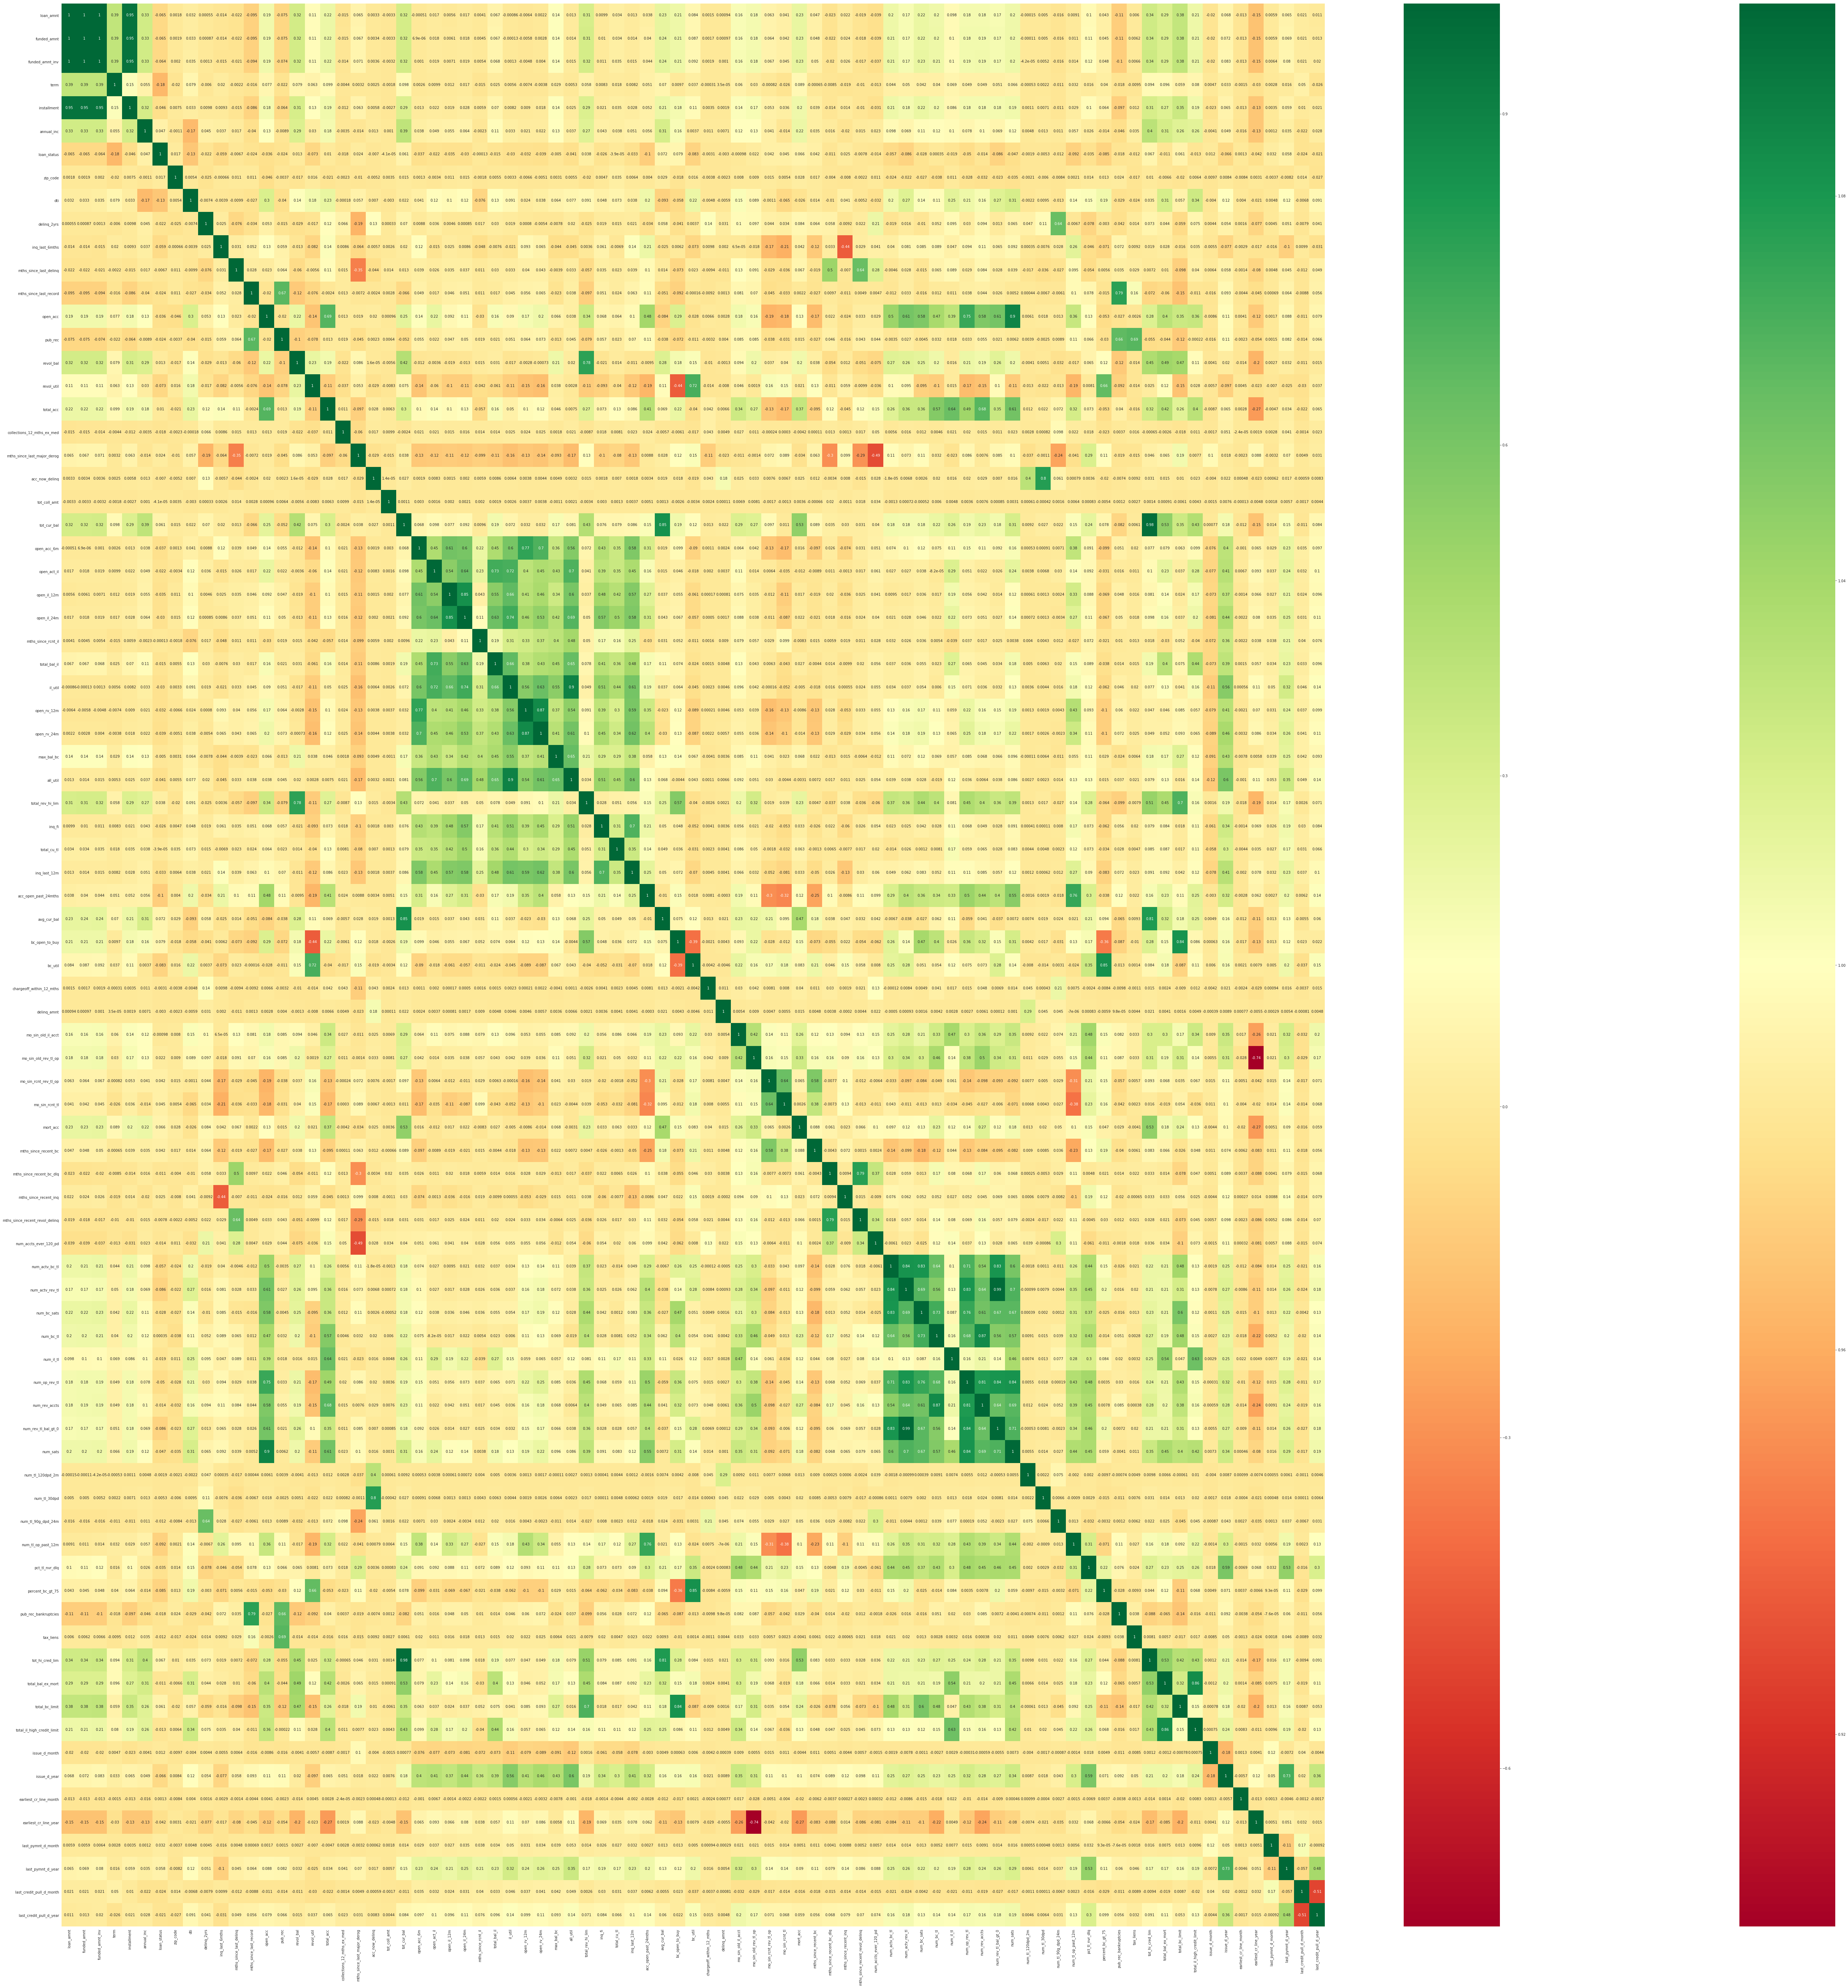

In [8]:
top_corr_features = corrmat.index[abs(corrmat["loan_status"])>0.7]
plt.figure(figsize=(100,100))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest")
    ax1.grid(True)
    plt.title('Feature Correlation')
    # labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    # ax1.set_xticklabels(labels,fontsize=6)
    # ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax) # , ticks=[.75,.8,.85,.90,.95,1])
    plt.figure(figsize=(100,100))
    plt.show()

# correlation_matrix(df)

In [9]:
corrmat['loan_status']

loan_amnt                     -0.064600
funded_amnt                   -0.064705
funded_amnt_inv               -0.064461
term                          -0.179020
installment                   -0.046376
annual_inc                     0.046626
loan_status                    1.000000
zip_code                       0.016743
dti                           -0.132727
delinq_2yrs                   -0.021500
inq_last_6mths                -0.058686
mths_since_last_delinq        -0.006682
mths_since_last_record        -0.024050
open_acc                      -0.035629
pub_rec                       -0.023743
revol_bal                      0.013240
revol_util                    -0.073424
total_acc                      0.010086
collections_12_mths_ex_med    -0.018161
mths_since_last_major_derog    0.024134
acc_now_delinq                -0.006976
tot_coll_amt                  -0.000041
tot_cur_bal                    0.061455
open_acc_6m                   -0.036631
open_act_il                   -0.022157


In [10]:
cat_features = df.select_dtypes(include=['object']).columns
print(cat_features)

for y in cat_features:
    # print(y + " has " + str(len(df[y].unique())) + " unique values")
    df = df.join(pd.get_dummies(df[y], prefix=y))
    df.drop(y, axis=1, inplace=True)
    
df.rename(columns = {'emp_length_<1':'emp_length_less_than_1'}, inplace = True)

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')


In [11]:
# top_corr_features = corrmat.loc[abs(corrmat['loan_status']) > 0.1]
# plt.figure(figsize=(10,10))
# sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
# sns.heatmap(top_corr_features.corr(), annot=True, cmap='RdYlGn')

In [12]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 50))
print("Redundant Pairs")
print(get_redundant_pairs(df))

Top Absolute Correlations
initial_list_status_f     initial_list_status_w             1.000000
loan_amnt                 funded_amnt                       0.999263
funded_amnt               funded_amnt_inv                   0.998521
loan_amnt                 funded_amnt_inv                   0.997638
num_actv_rev_tl           num_rev_tl_bal_gt_0               0.986782
tot_cur_bal               tot_hi_cred_lim                   0.979400
funded_amnt               installment                       0.954676
loan_amnt                 installment                       0.953566
funded_amnt_inv           installment                       0.953128
il_util                   all_util                          0.900952
open_acc                  num_sats                          0.897143
num_bc_tl                 num_rev_accts                     0.871201
open_rv_12m               open_rv_24m                       0.870894
total_bal_ex_mort         total_il_high_credit_limit        0.864320
open_il_

/home/anilraj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mu = 0.79 and sigma = 0.40


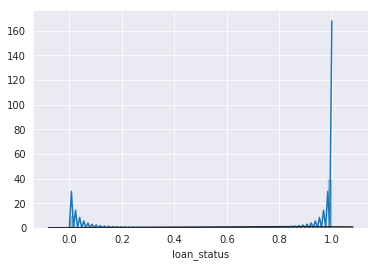

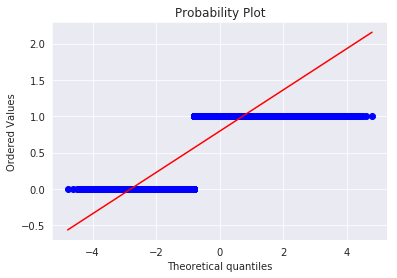

In [13]:
# Target Variable 
def check_skewness(col):
    sns.distplot(df[col], fit=norm)
    fig = plt.figure()
    res = stats.probplot(df[col], plot=plt)
    (mu, sigma) = norm.fit(df[col])
    print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

check_skewness('loan_status')

In [14]:
# Separate out the feature and label
loan_status = df['loan_status']
df = df.drop('loan_status', axis=1)

In [15]:
# Highly skewed features

skewed_features = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness

Skew
tot_coll_amt                         858.560473
addr_state_IA                        402.631593
delinq_amnt                           75.149751
total_rev_hi_lim                      58.023173
purpose_educational                   51.023074
num_tl_120dpd_2m                      48.971680
annual_inc                            44.863324
tax_liens                             42.379586
addr_state_ID                         39.751187
purpose_renewable_energy              36.776066
addr_state_ND                         36.622937
sub_grade_G5                          35.770906
addr_state_ME                         34.431507
sub_grade_G4                          31.803916
sub_grade_G3                          27.863978
addr_state_NE                         24.121212
sub_grade_G2                          23.251833
addr_state_VT                         22.929312
num_tl_30dpd                          22.026855
addr_state_SD                         21.982957
addr_state_WY                         21.079374
sub_grade_G1                          20.220793
addr_state_AK                         19.712564
purpose_wedding                       19.094787
addr_state_DE                         18.875928
addr_state_DC                         18.833881
max_bal_bc                            18.776279
addr_state_MT                         18.631792
acc_now_delinq                        18.523642
chargeoff_within_12_mths              17.290900
...                                         ...
verification_status_Not Verified       0.828721
num_sats                               0.768121
funded_amnt                            0.767444
funded_amnt_inv                        0.766866
loan_amnt                              0.765212
emp_length_10+                         0.744081
verification_status_Verified           0.727181
mo_sin_old_rev_tl_op                   0.712372
verification_status_Source Verified    0.573171
home_ownership_RENT                    0.409651
last_credit_pull_d_month               0.284349
dti                                    0.244330
percent_bc_gt_75                       0.225528
zip_code                               0.025426
initial_list_status_w                  0.023585
home_ownership_MORTGAGE                0.005907
initial_list_status_f                 -0.023585
issue_d_month                         -0.028589
mo_sin_old_il_acct                    -0.051696
revol_util                            -0.067375
last_pymnt_d_month                    -0.078764
earliest_cr_line_month                -0.128582
purpose_debt_consolidation            -0.368930
bc_util                               -0.413254
mths_since_last_major_derog           -0.659142
issue_d_year                          -0.758774
earliest_cr_line_year                 -0.954509
last_pymnt_d_year                     -1.347765
last_credit_pull_d_year               -1.828918
pct_tl_nvr_dlq                        -2.646630

[209 rows x 1 columns]

In [16]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed features to Box Cox transform'.format(skewness.shape[0]))

There are 209 skewed features to Box Cox transform


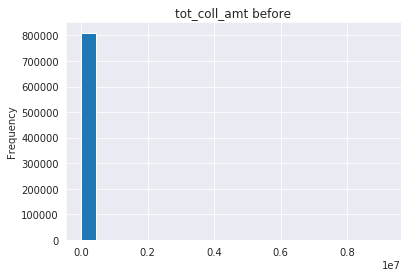

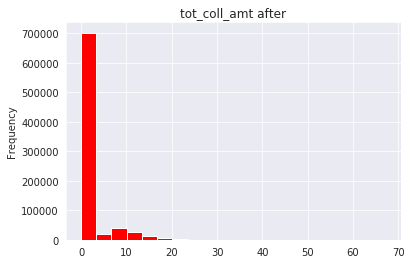

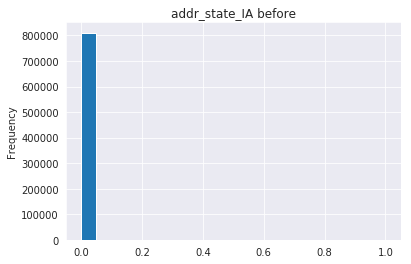

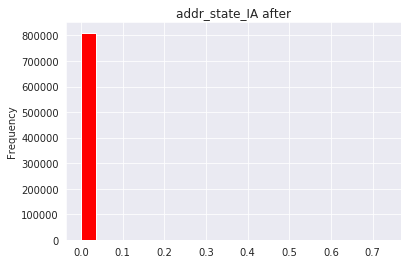

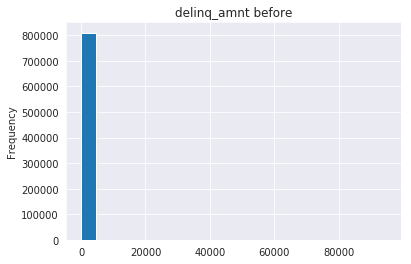

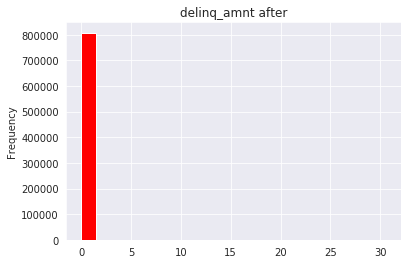

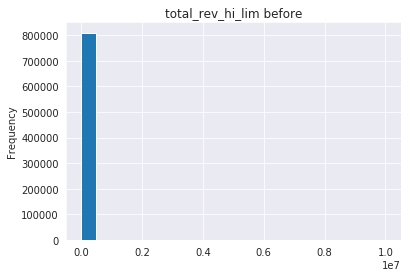

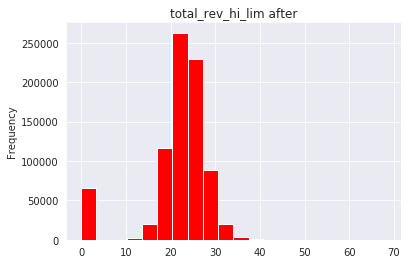

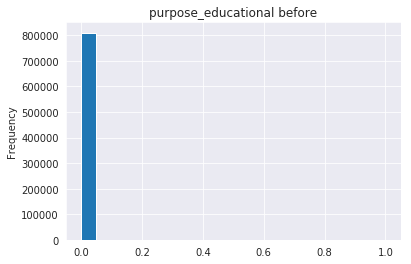

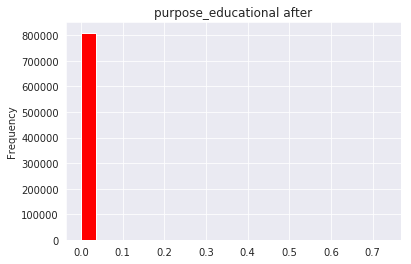

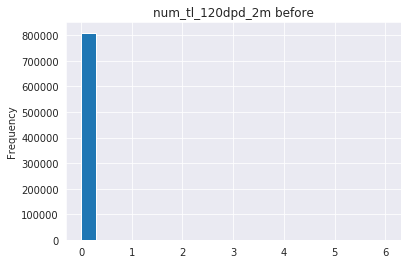

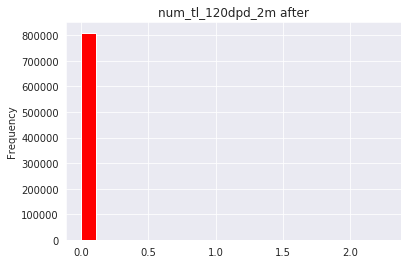

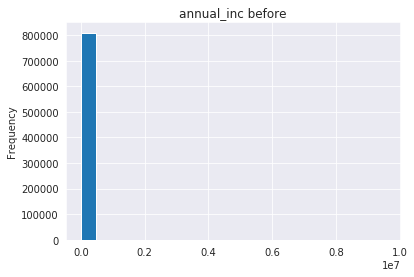

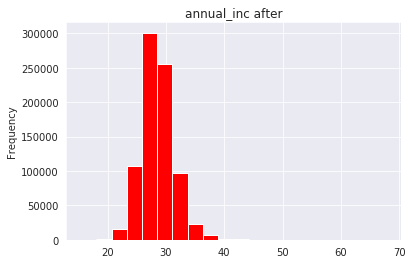

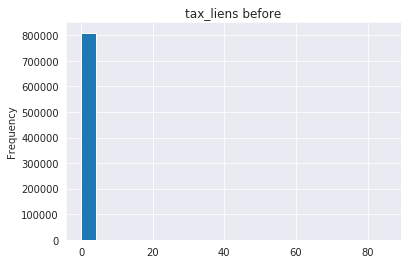

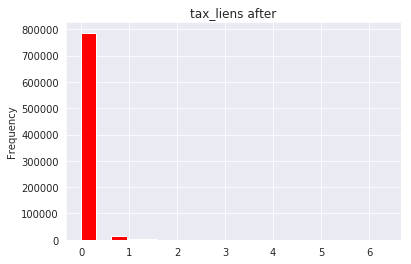

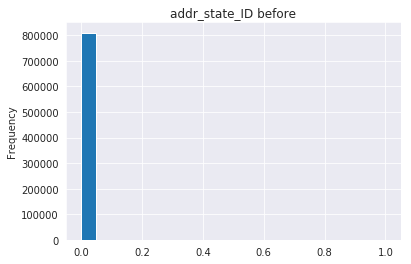

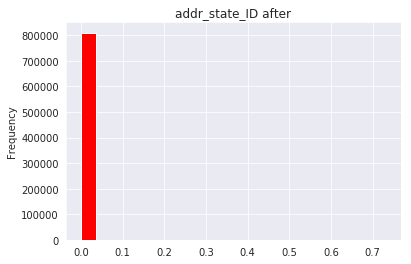

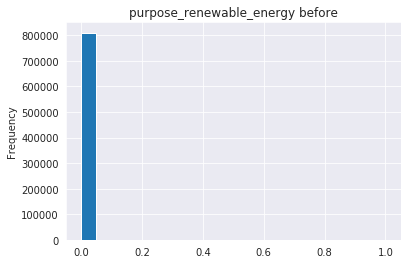

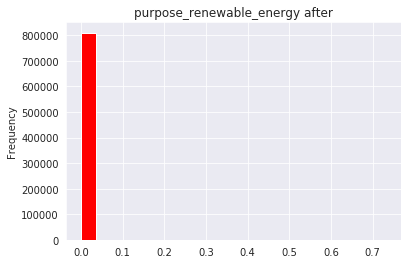

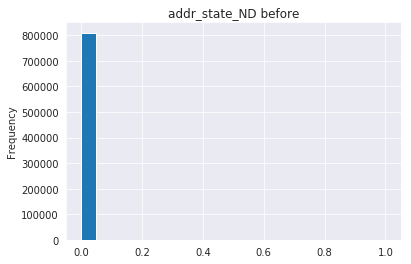

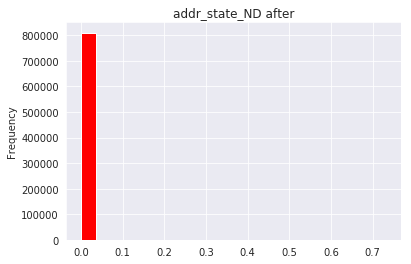

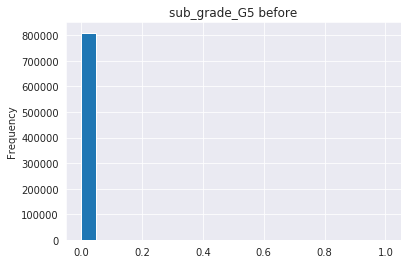

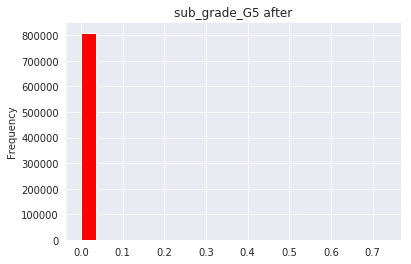

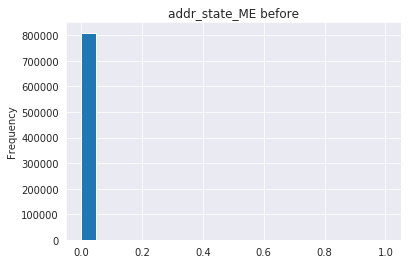

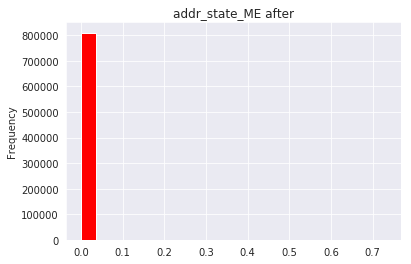

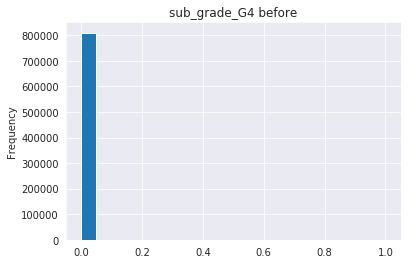

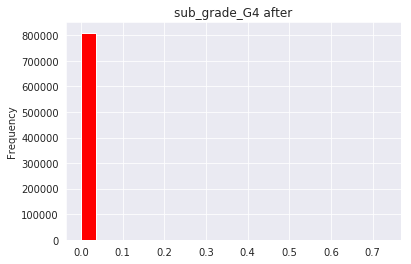

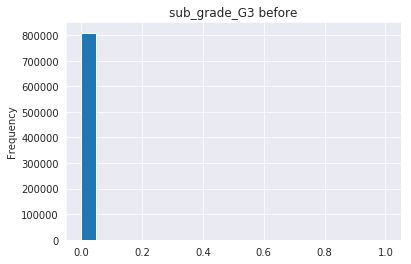

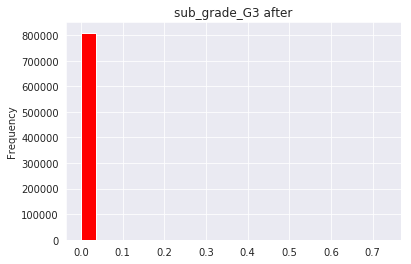

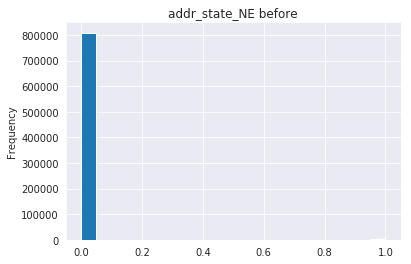

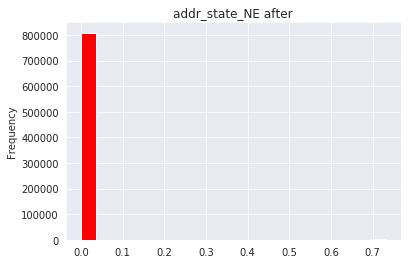

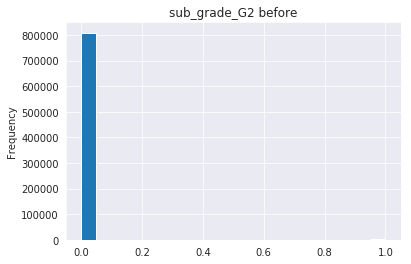

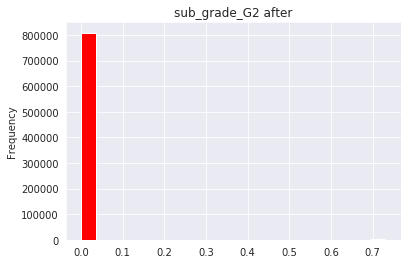

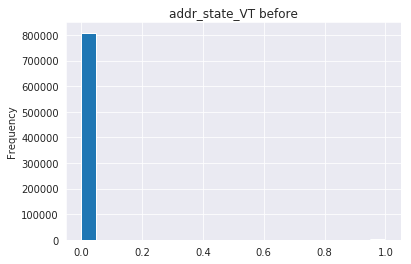

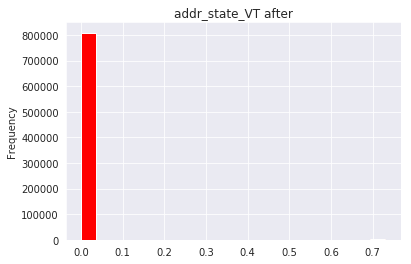

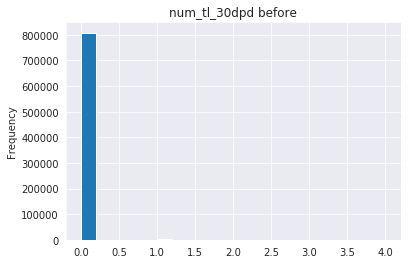

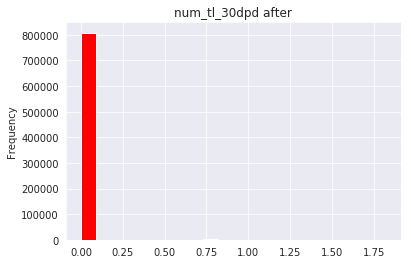

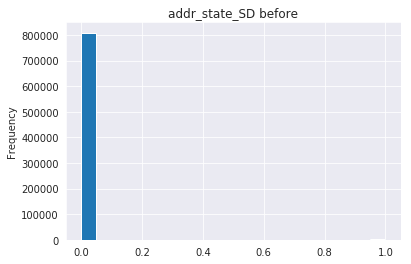

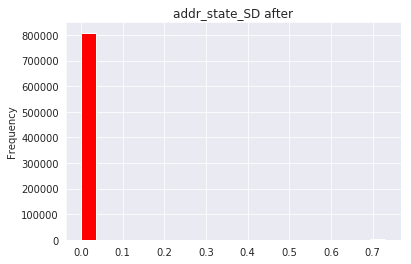

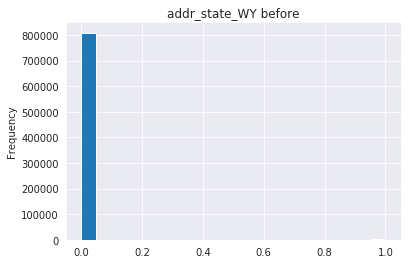

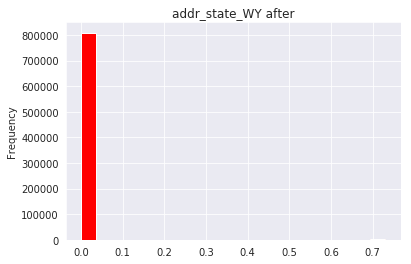

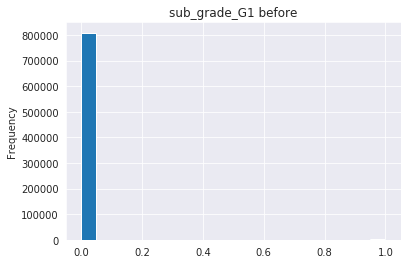

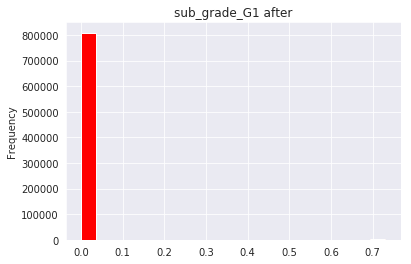

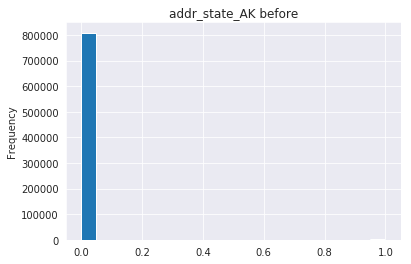

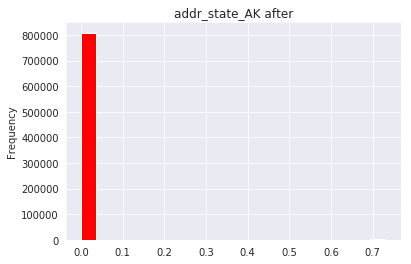

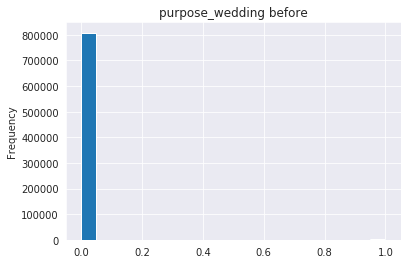

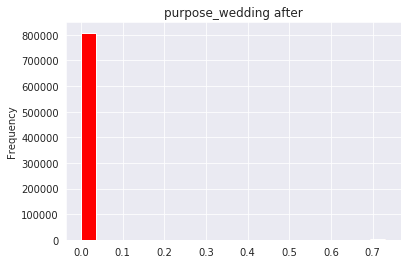

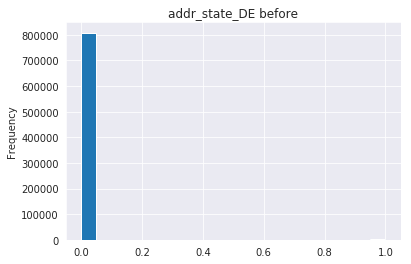

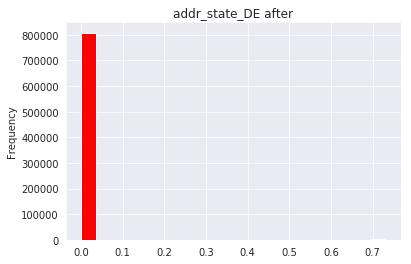

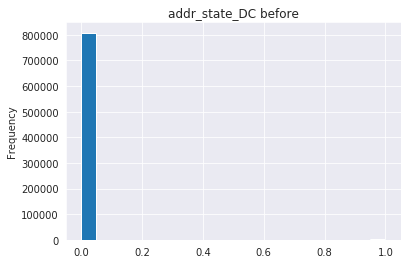

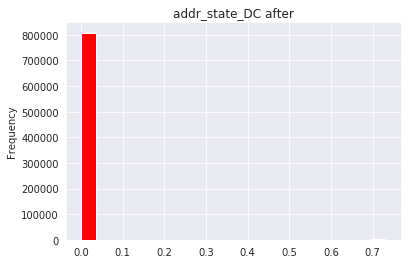

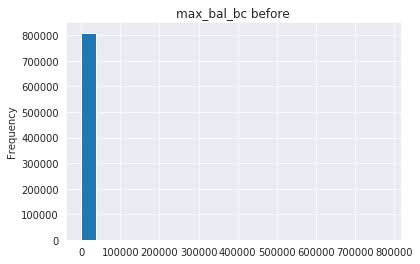

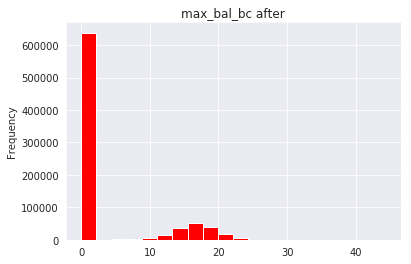

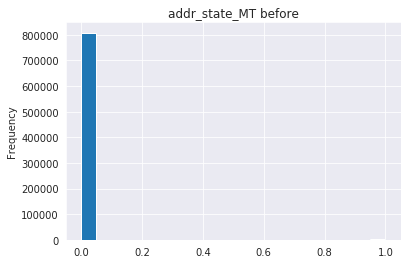

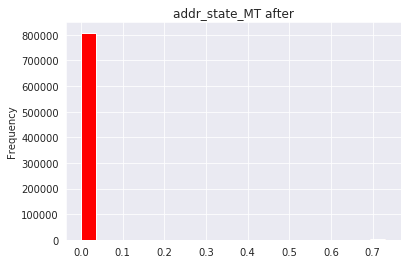

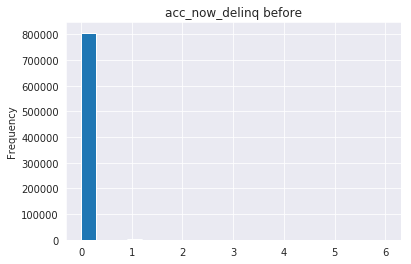

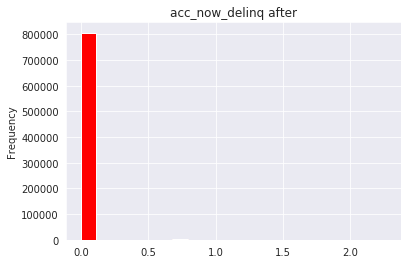

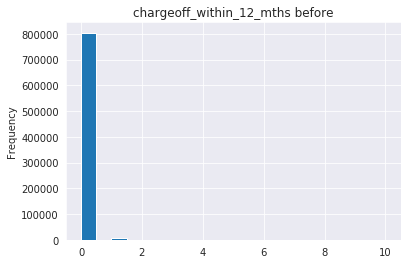

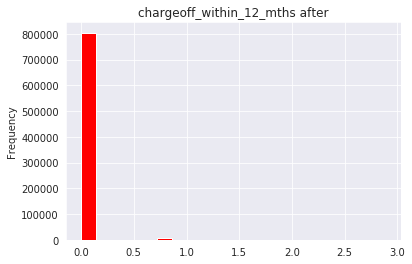

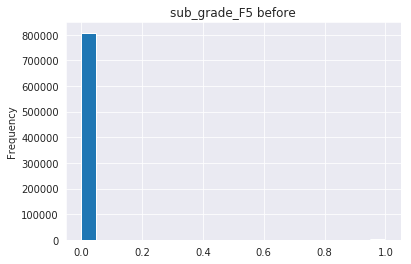

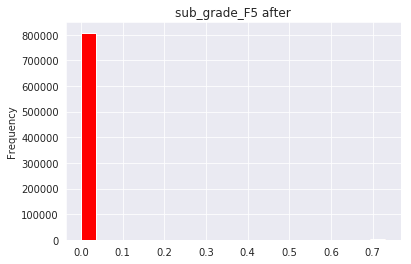

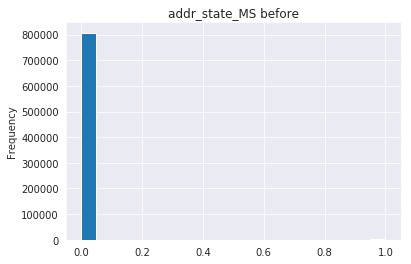

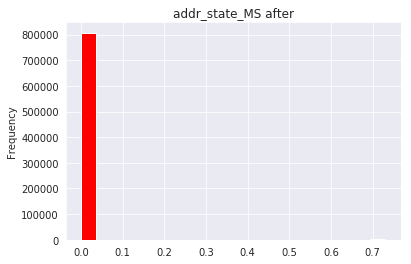

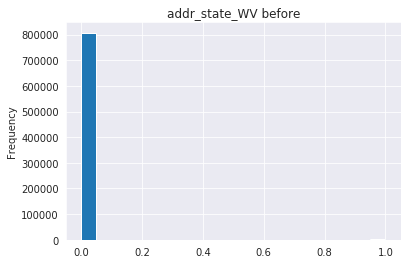

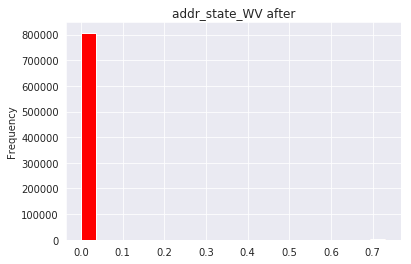

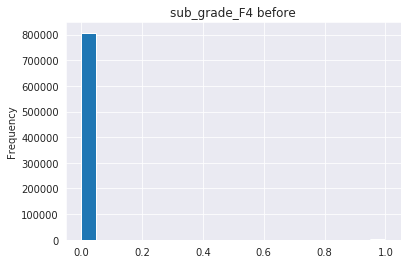

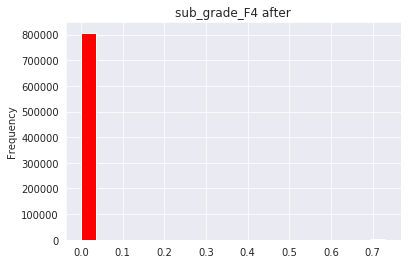

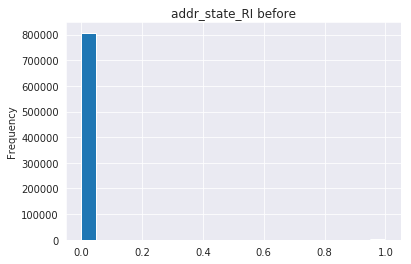

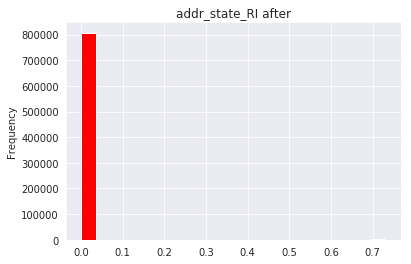

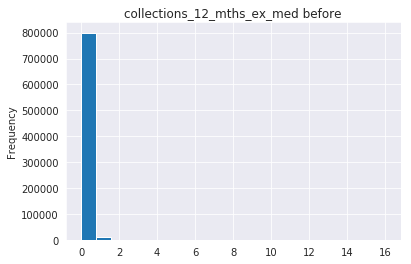

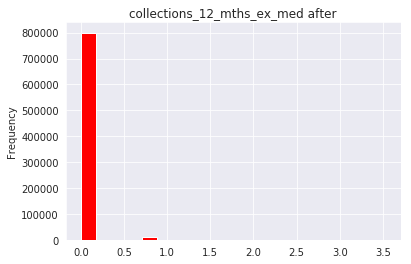

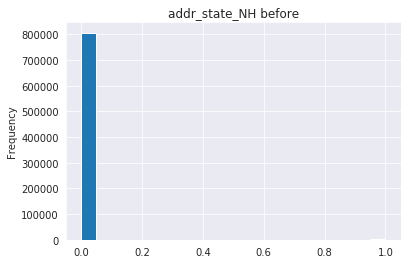

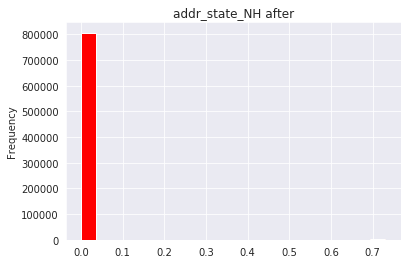

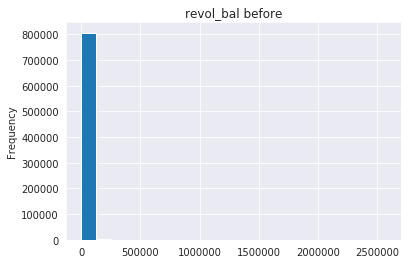

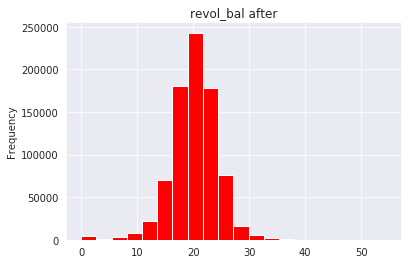

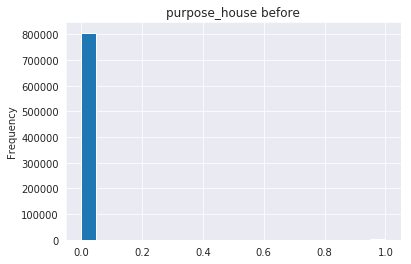

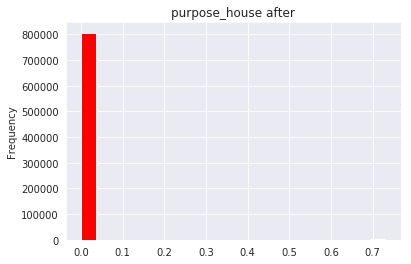

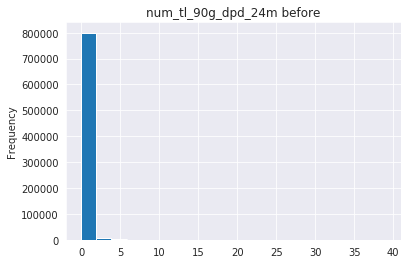

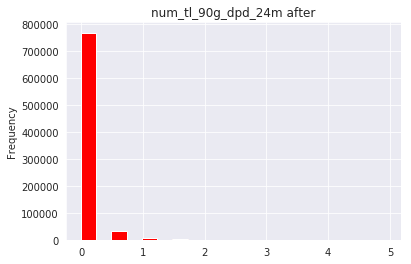

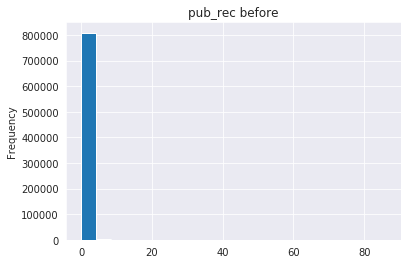

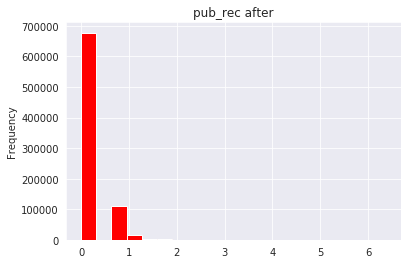

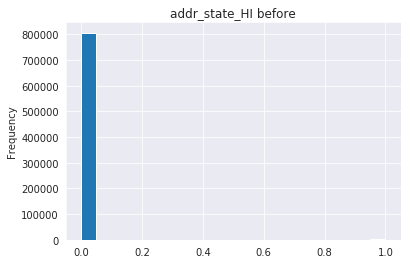

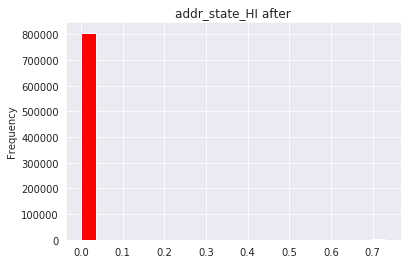

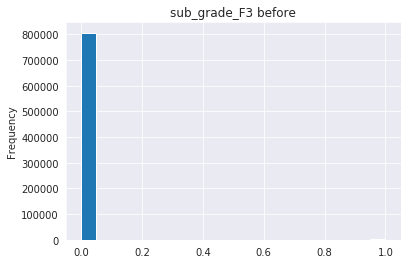

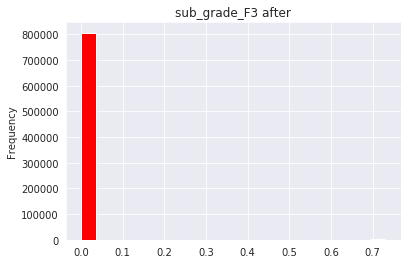

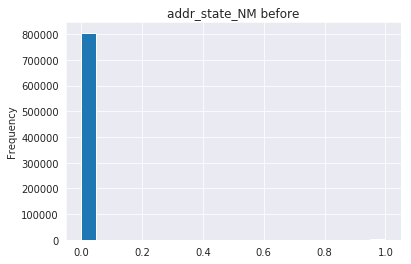

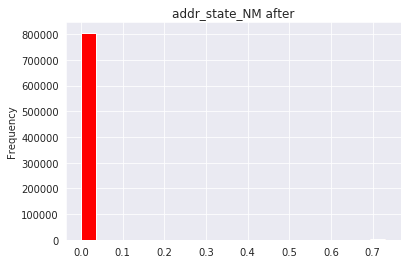

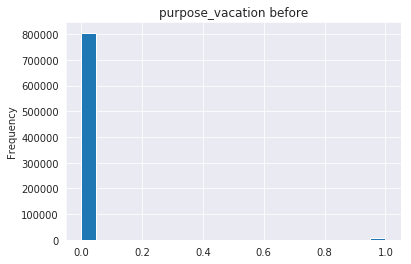

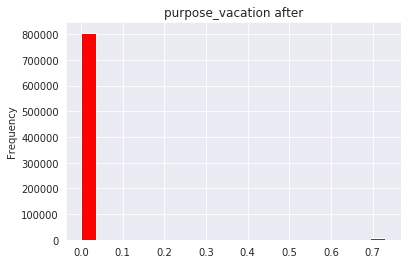

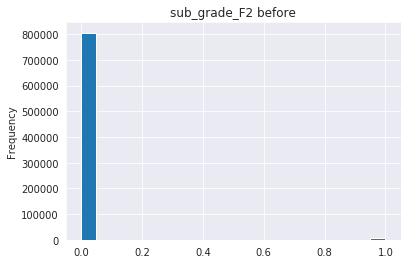

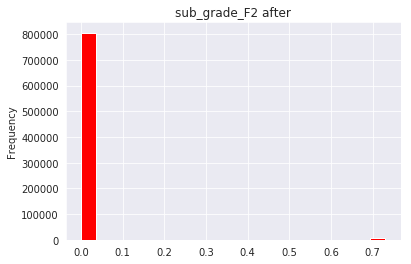

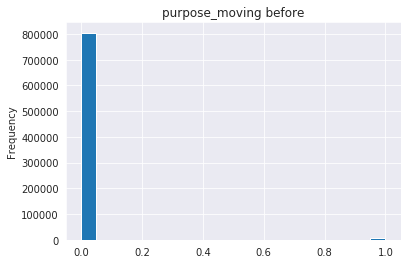

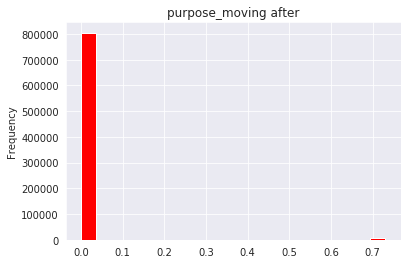

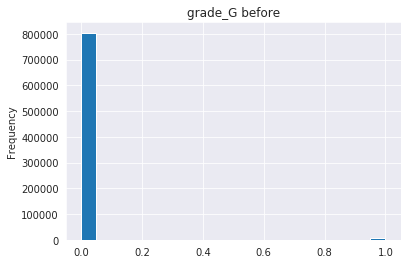

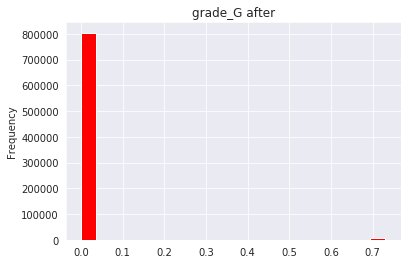

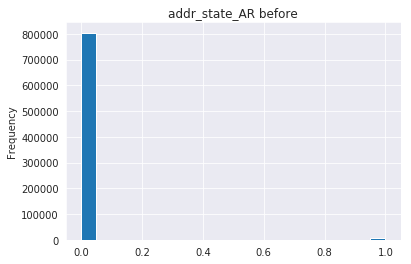

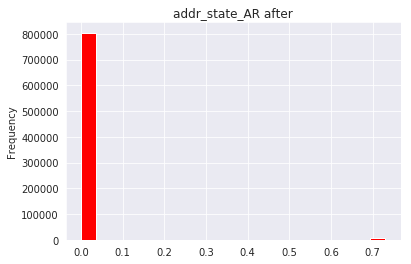

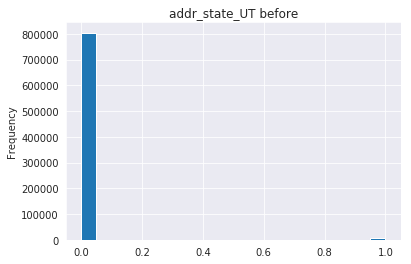

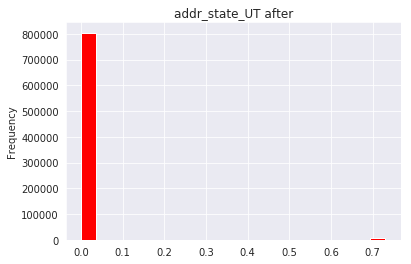

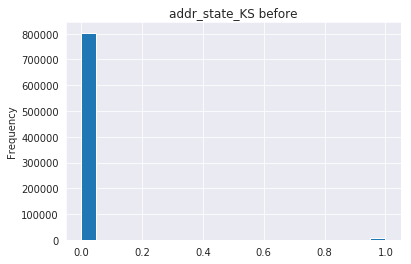

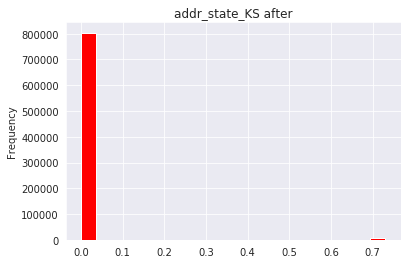

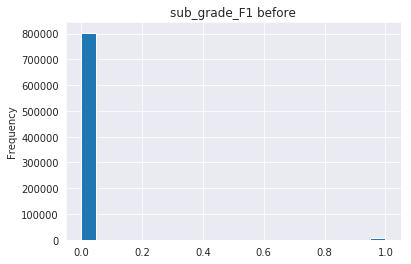

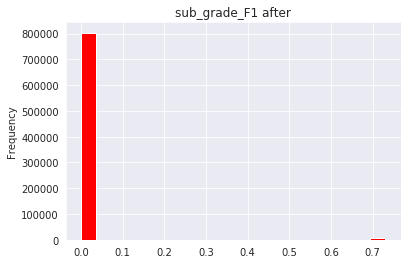

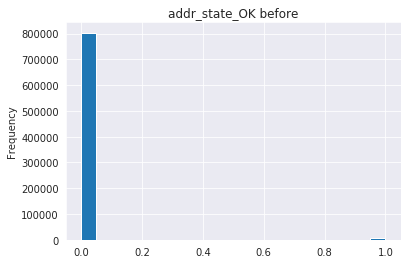

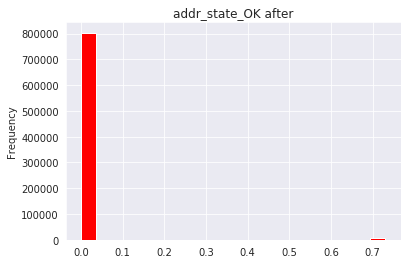

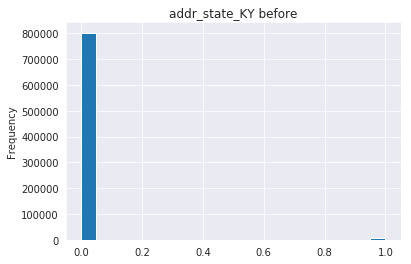

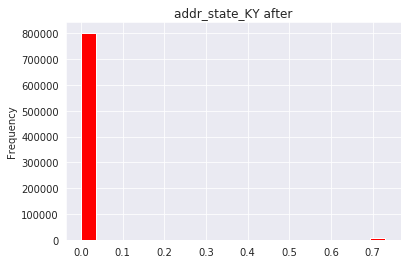

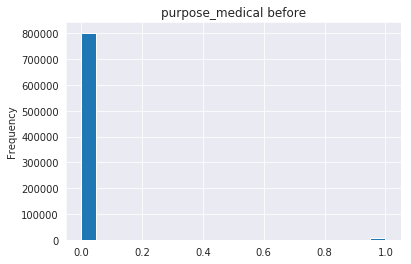

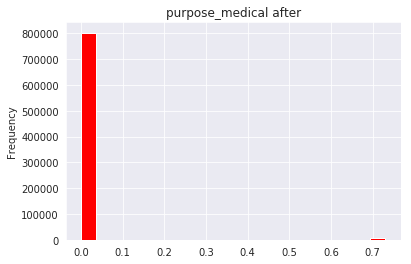

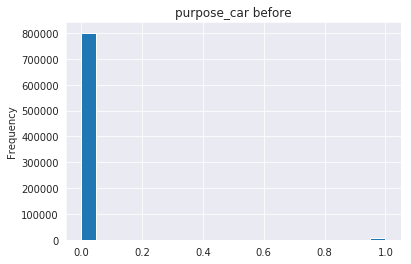

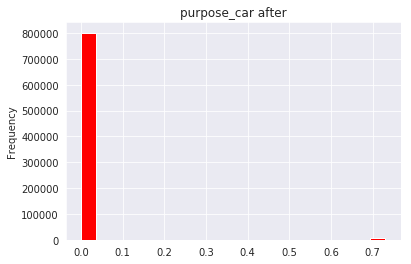

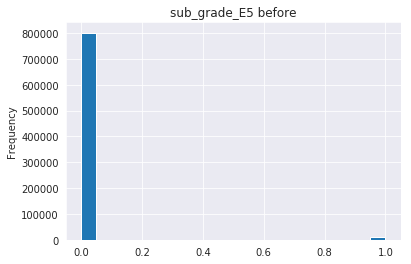

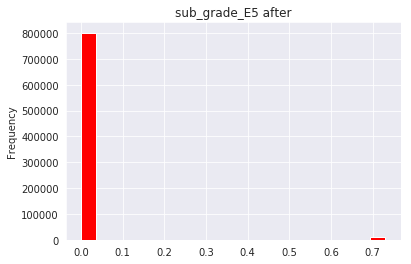

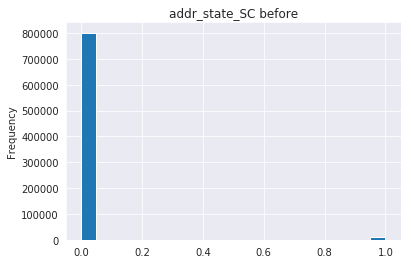

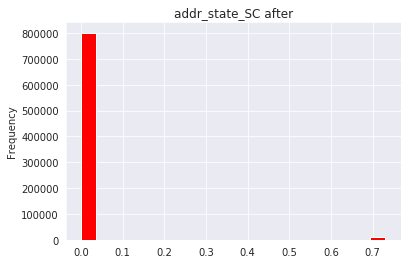

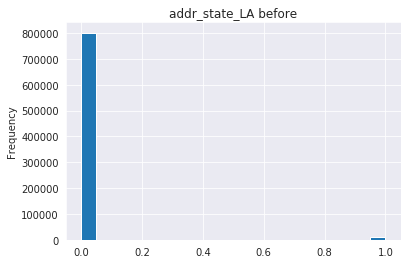

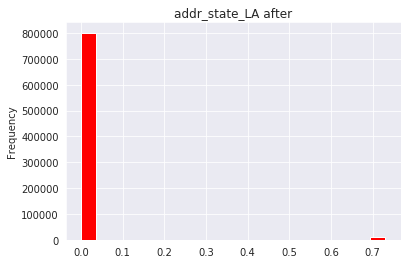

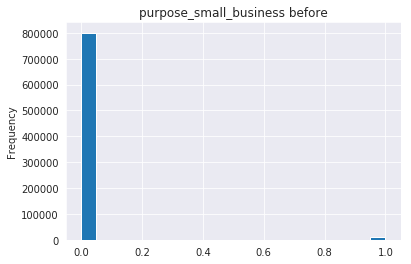

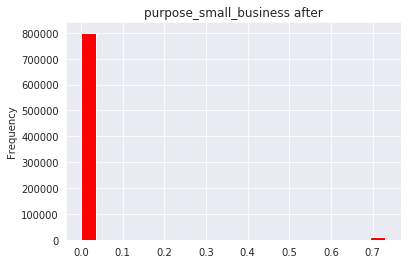

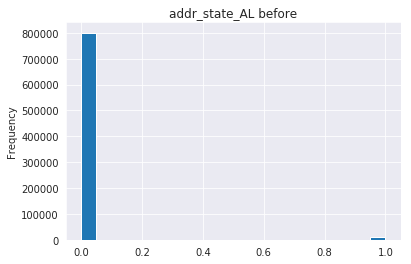

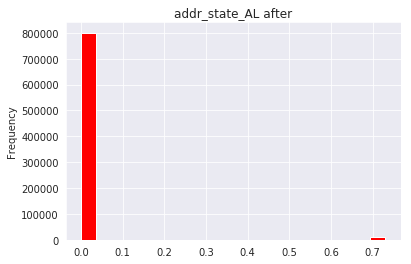

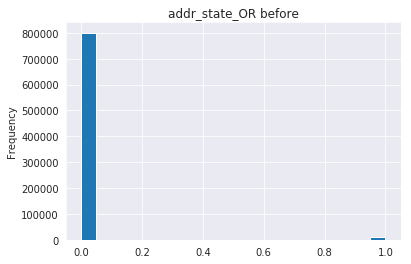

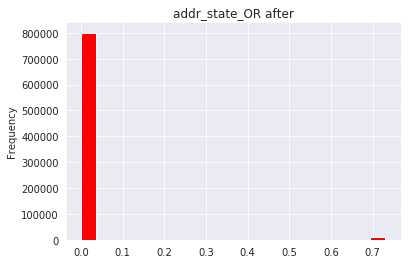

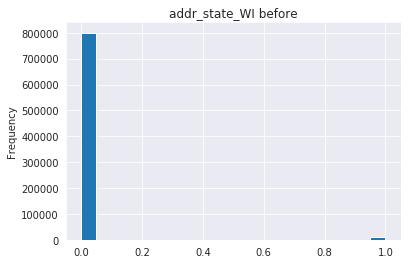

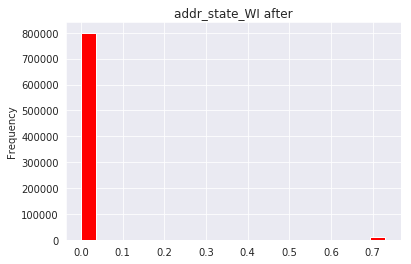

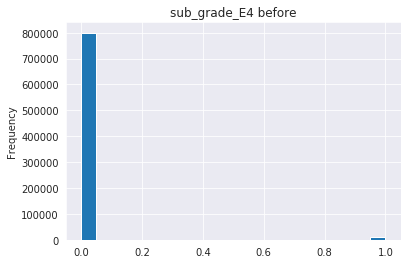

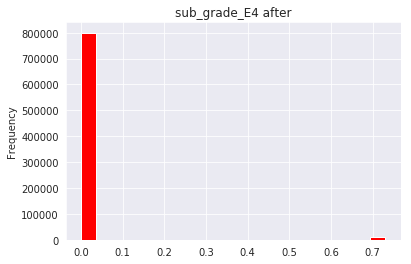

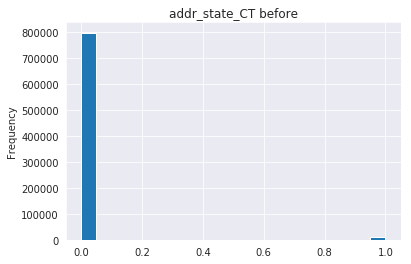

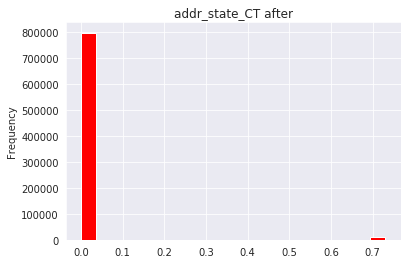

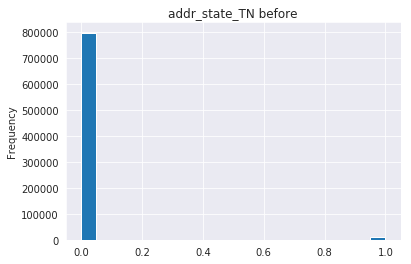

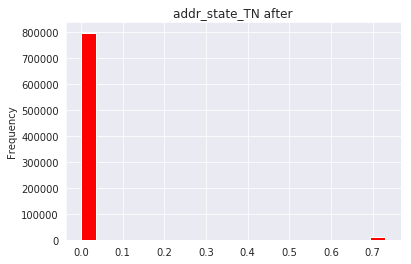

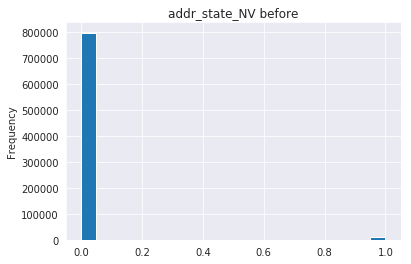

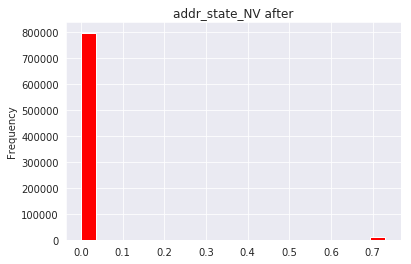

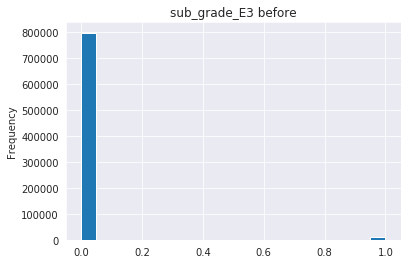

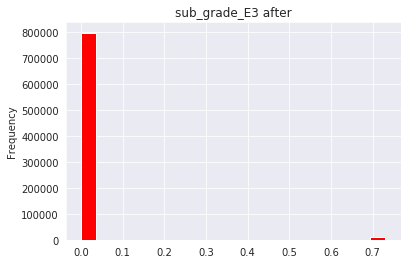

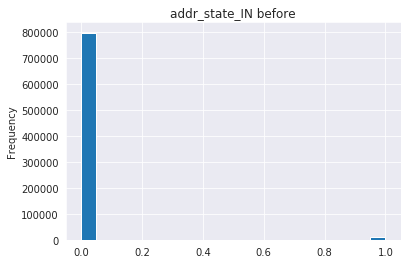

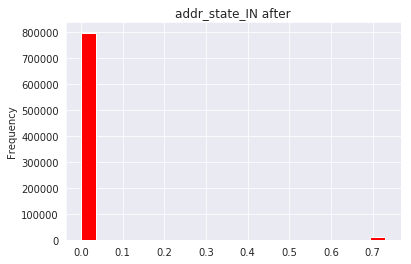

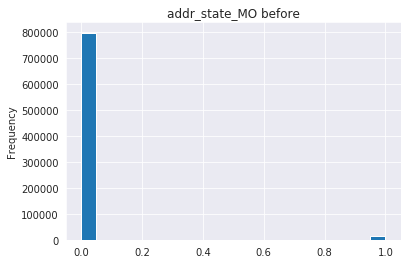

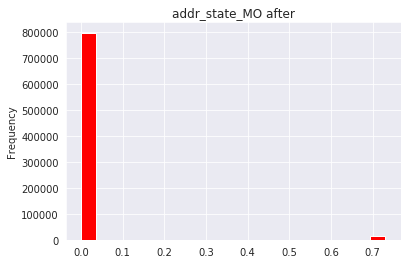

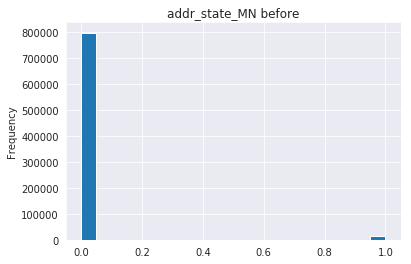

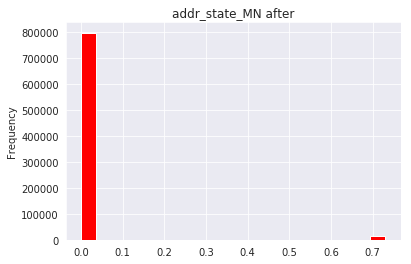

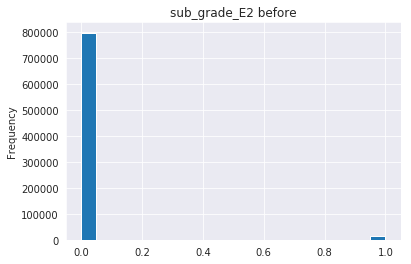

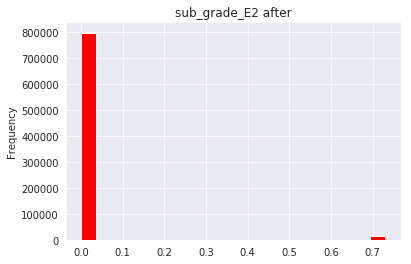

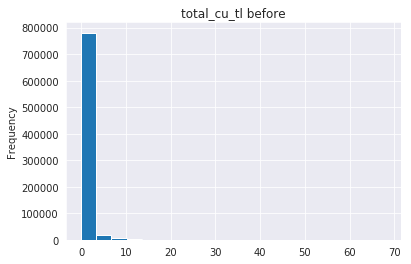

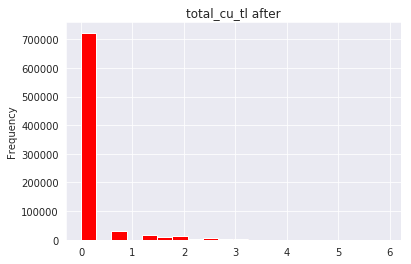

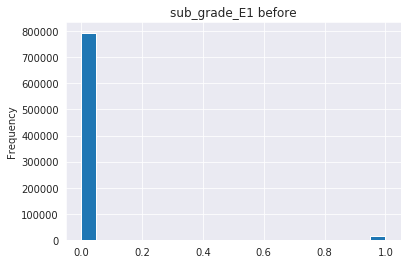

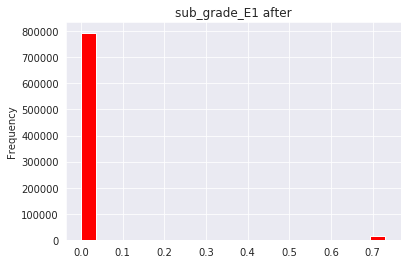

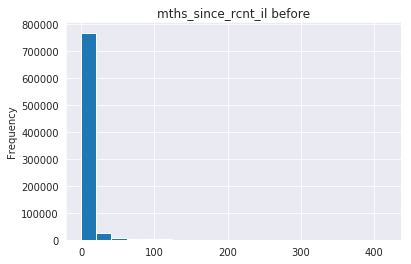

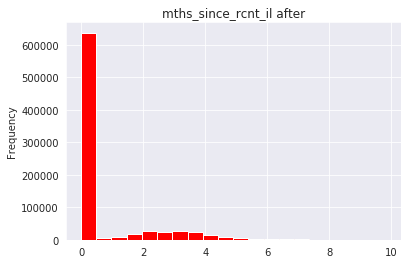

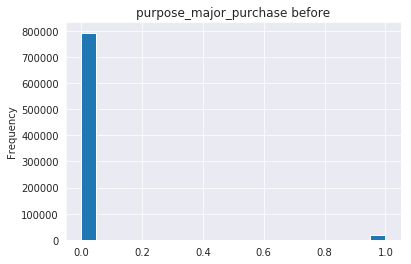

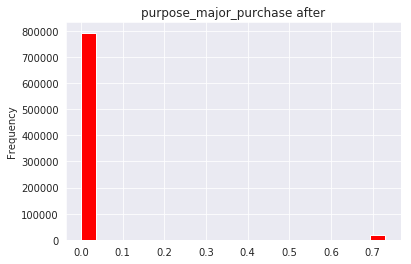

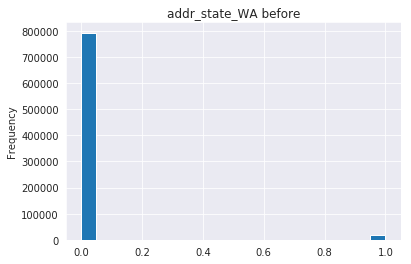

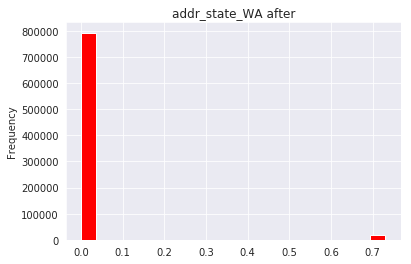

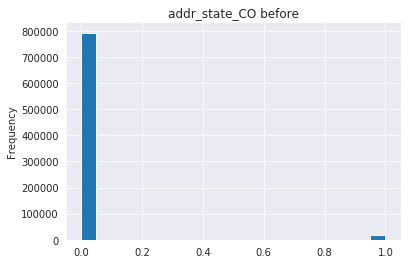

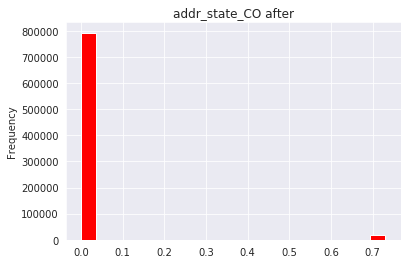

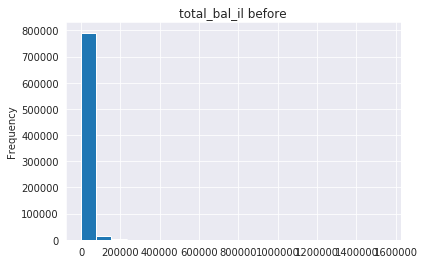

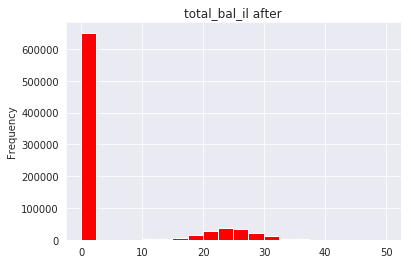

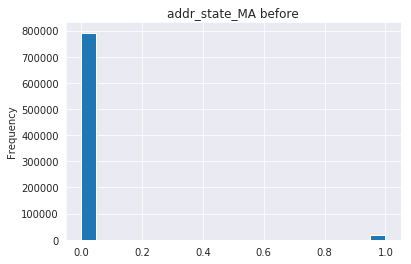

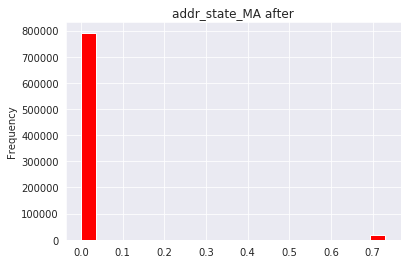

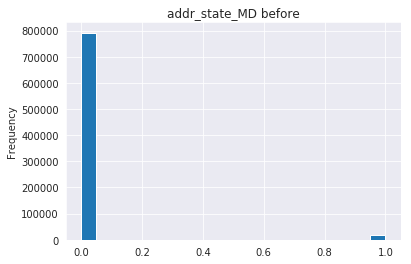

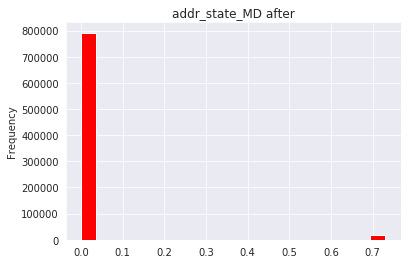

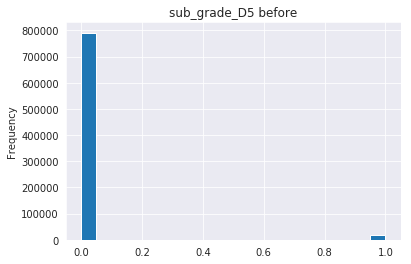

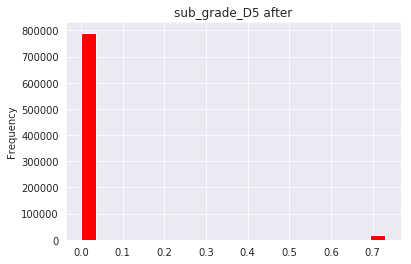

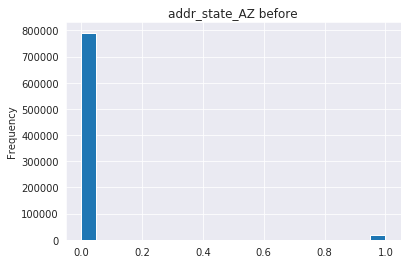

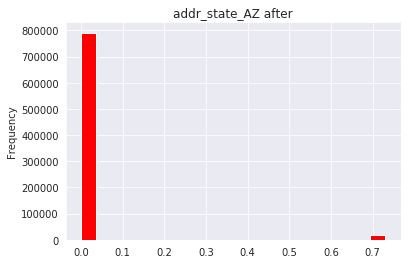

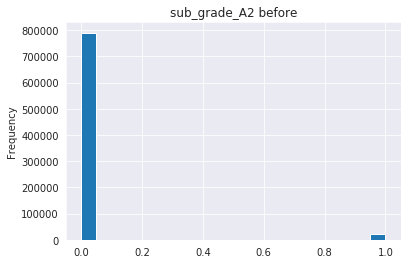

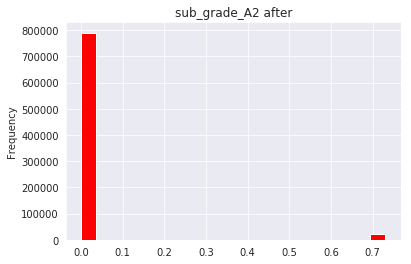

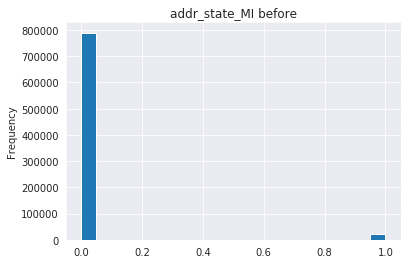

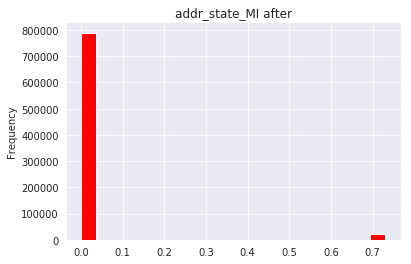

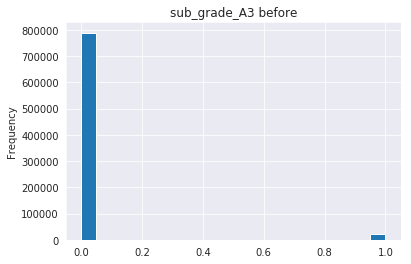

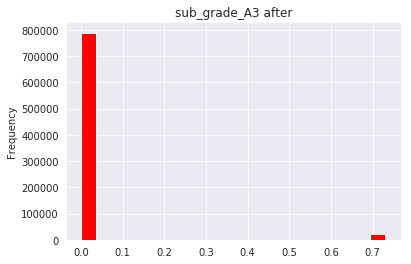

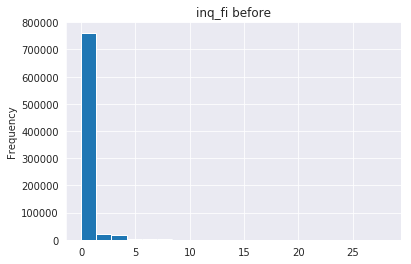

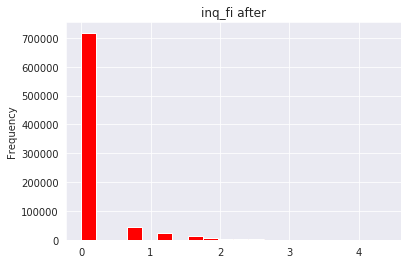

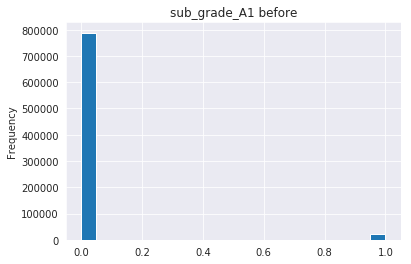

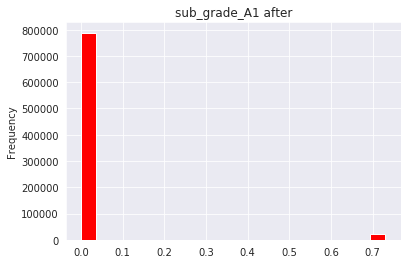

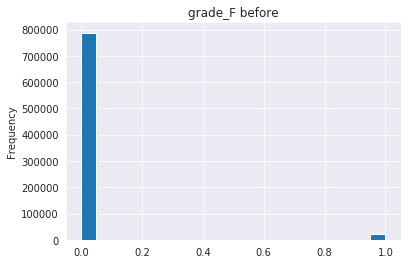

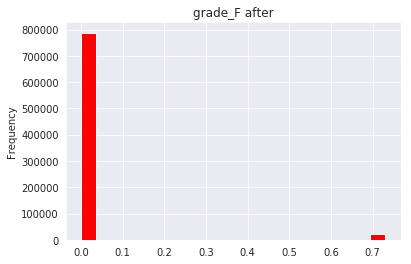

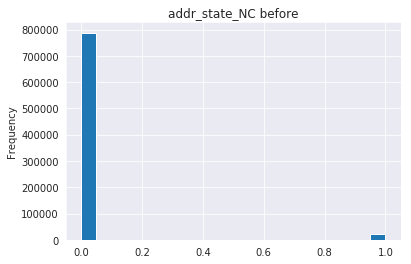

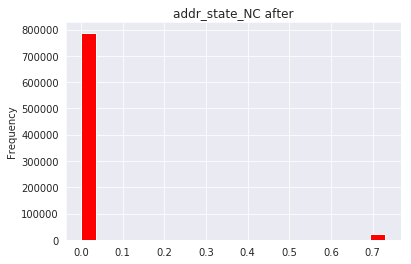

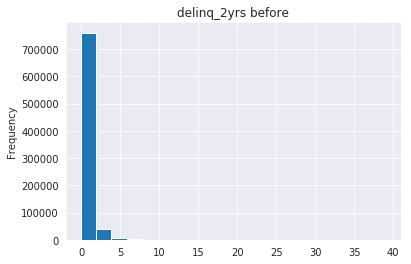

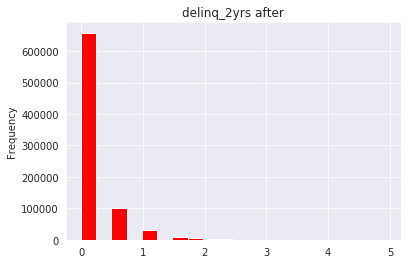

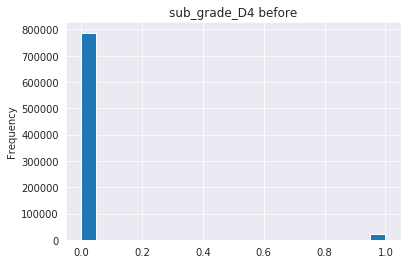

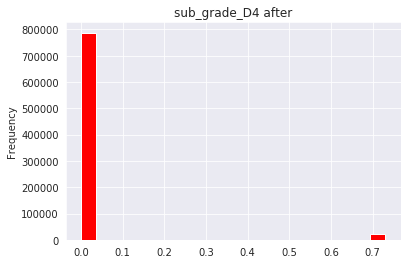

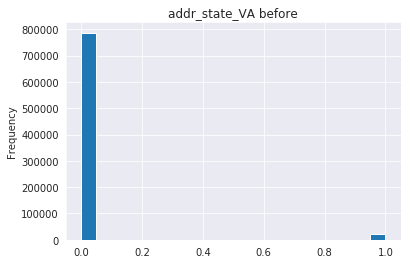

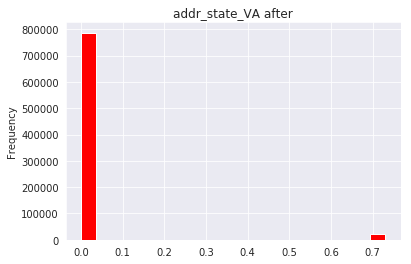

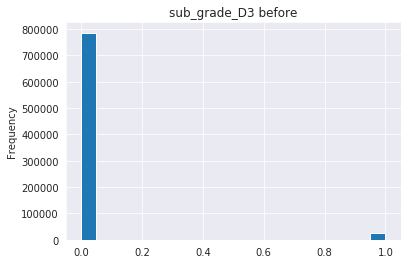

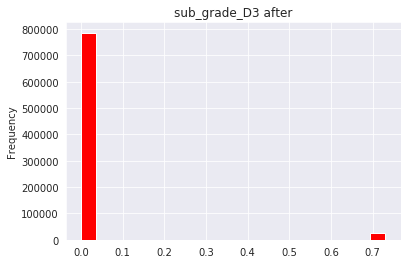

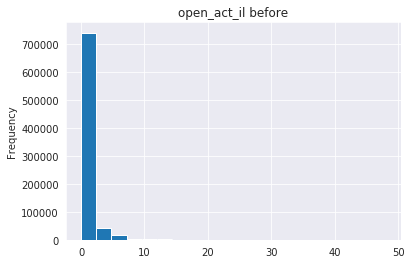

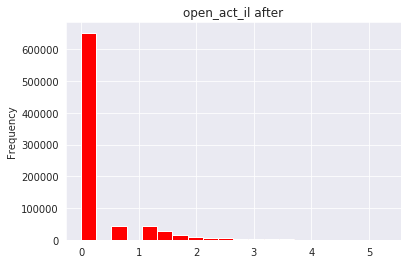

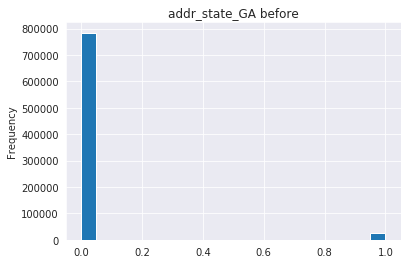

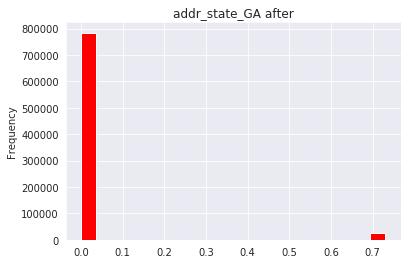

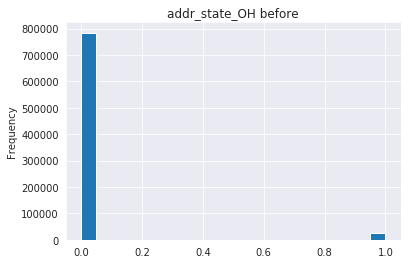

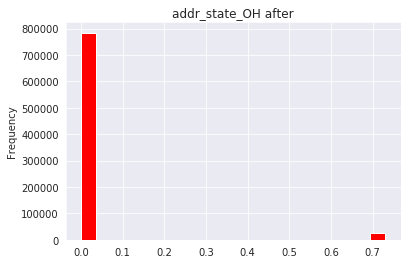

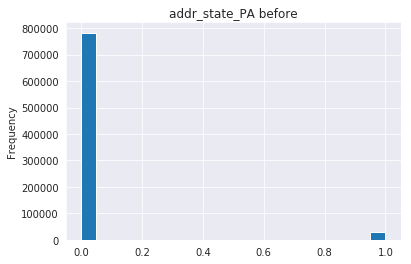

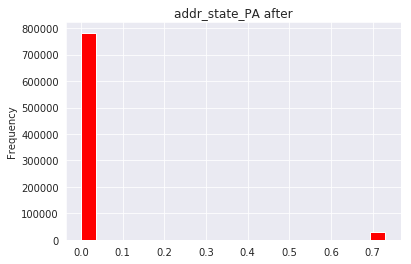

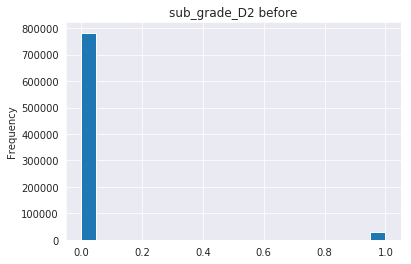

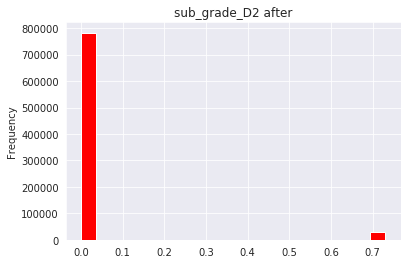

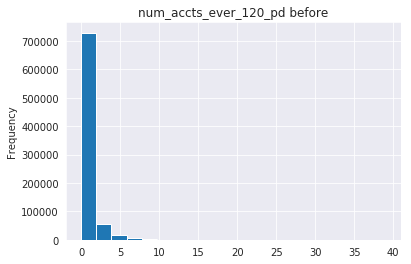

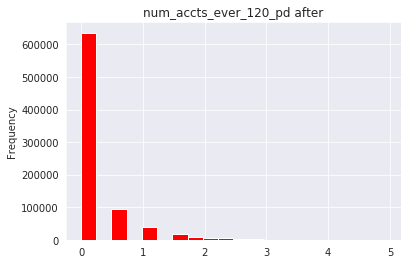

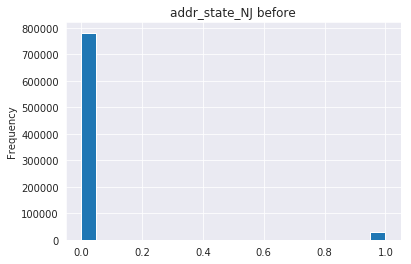

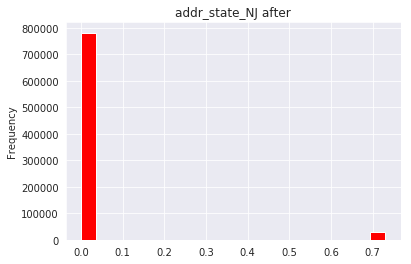

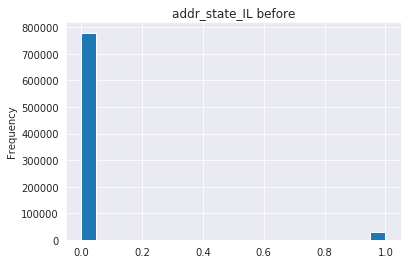

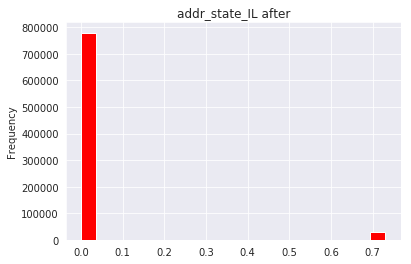

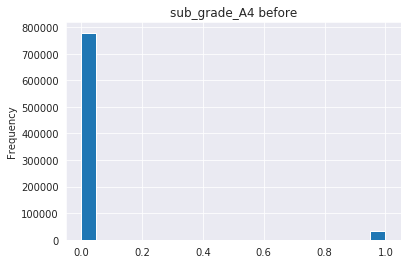

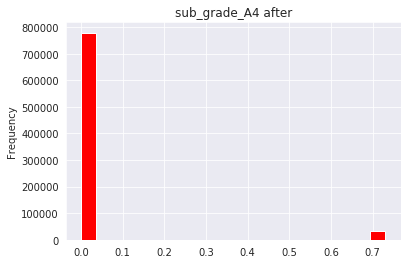

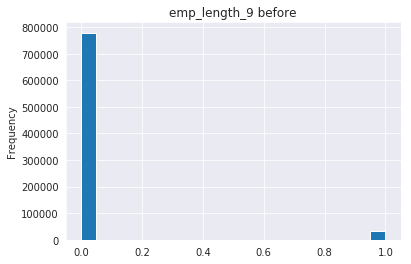

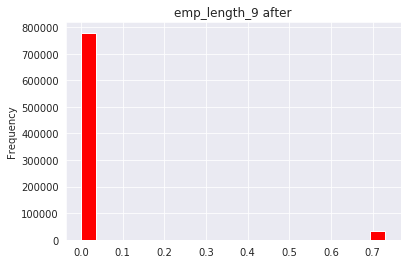

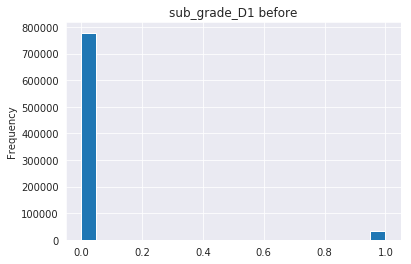

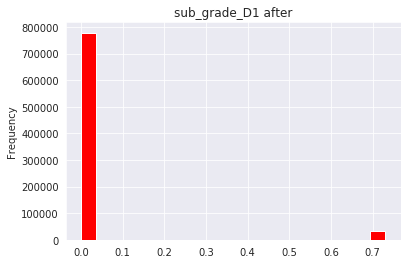

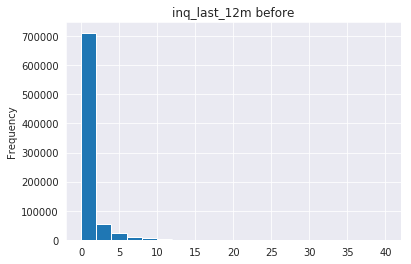

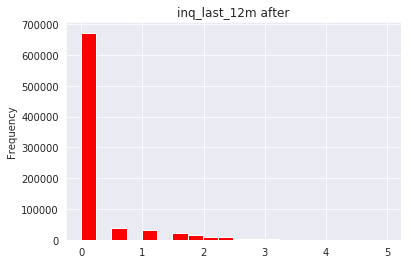

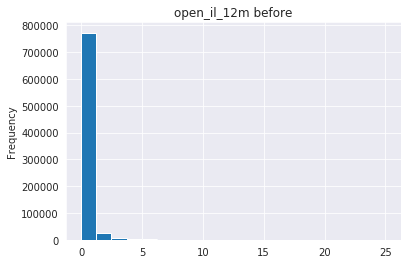

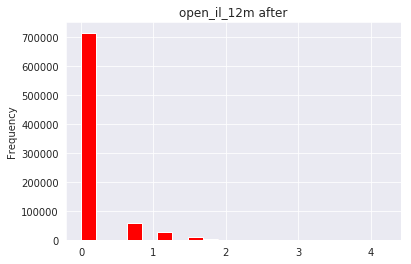

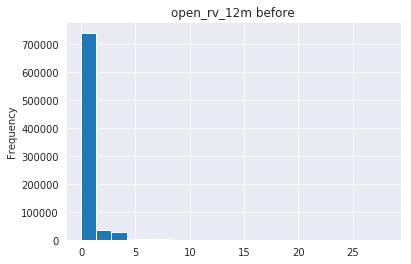

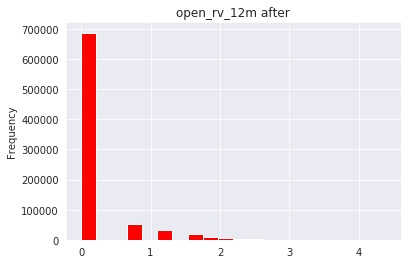

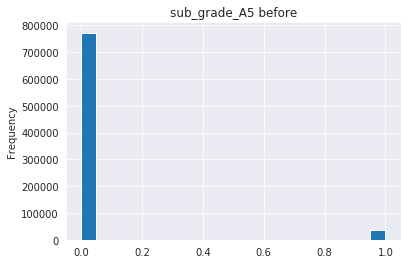

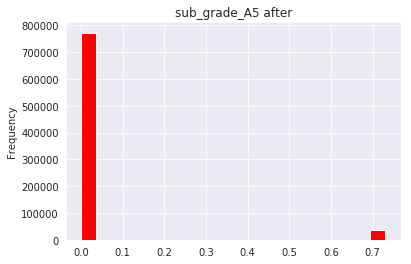

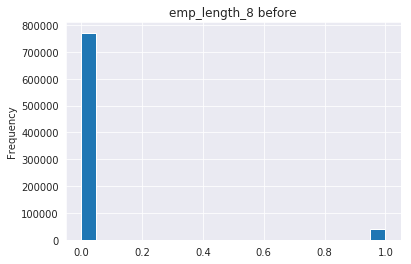

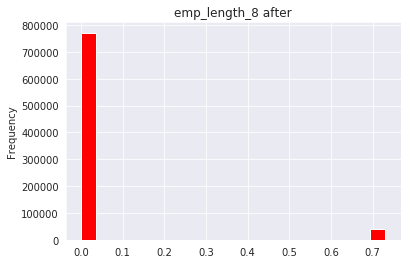

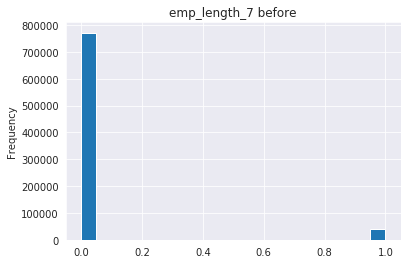

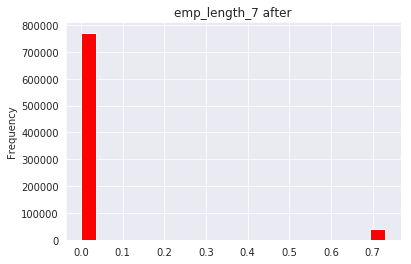

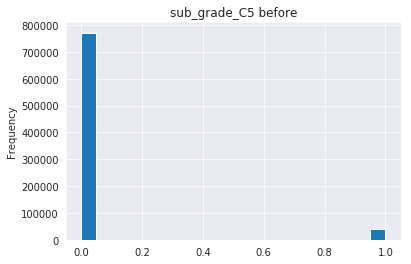

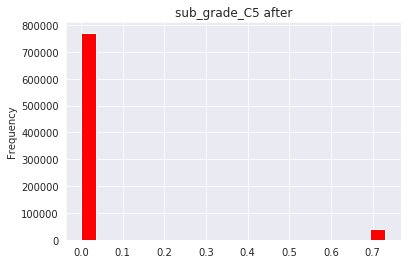

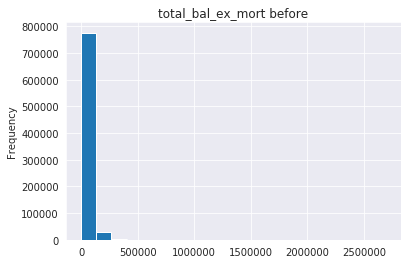

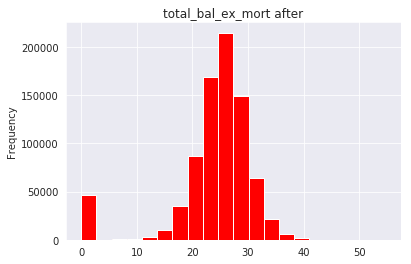

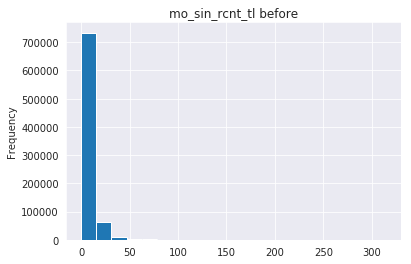

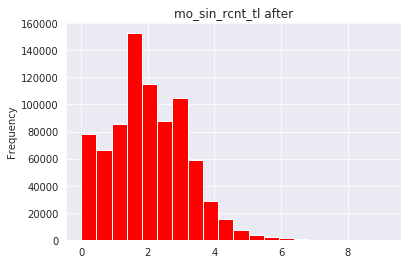

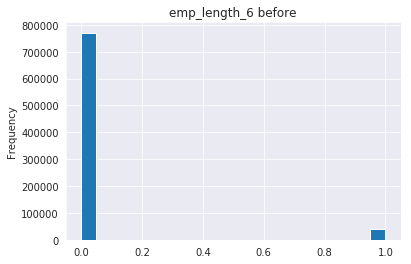

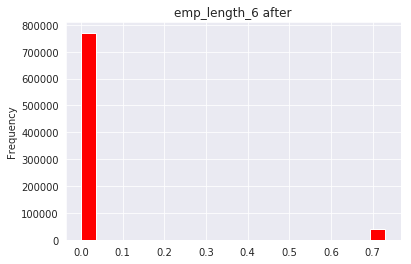

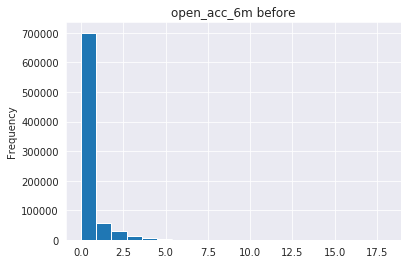

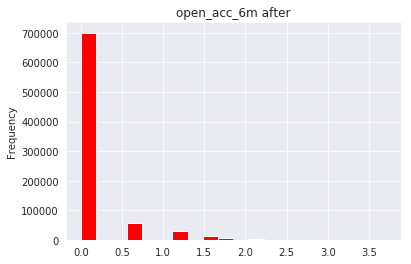

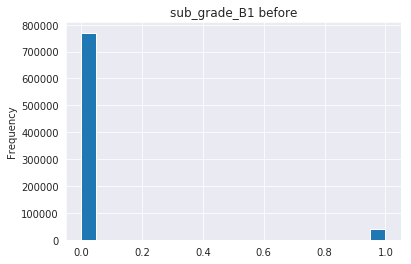

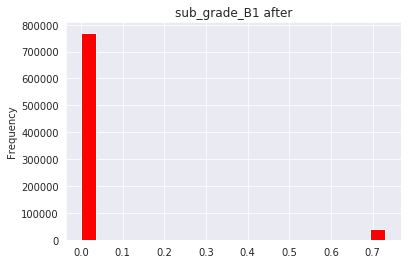

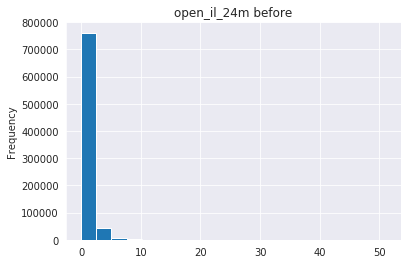

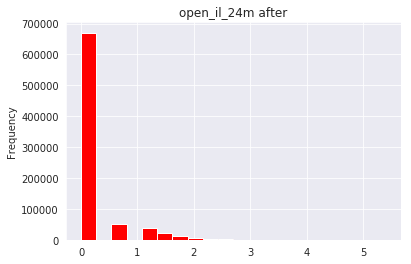

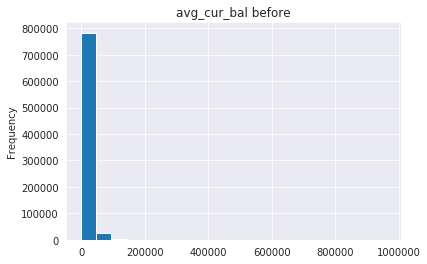

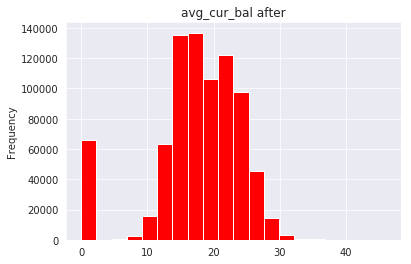

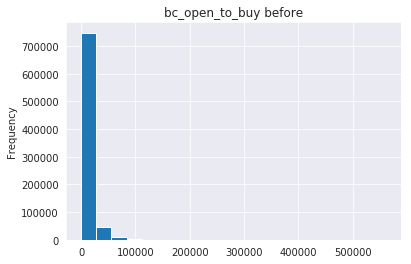

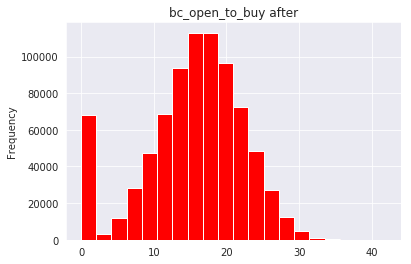

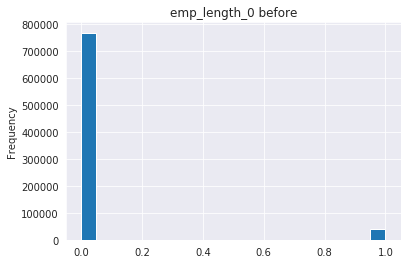

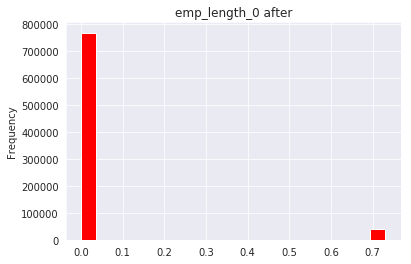

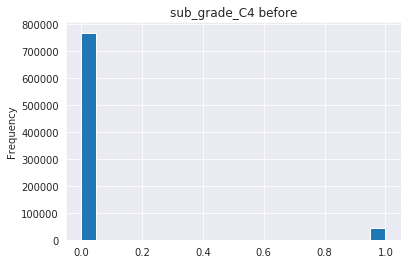

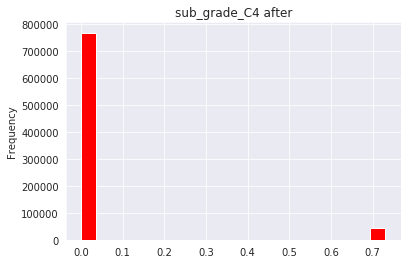

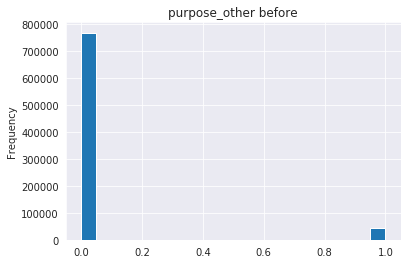

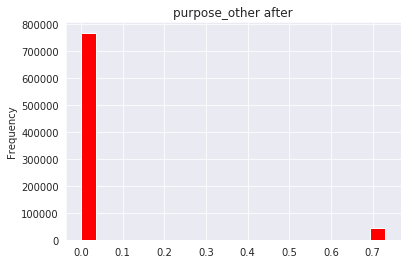

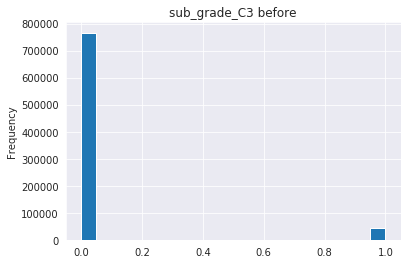

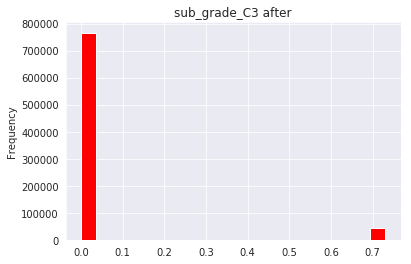

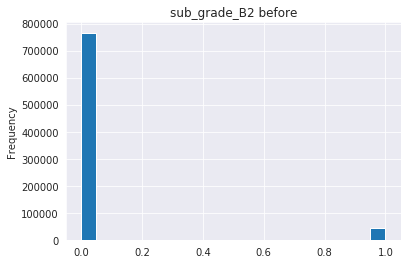

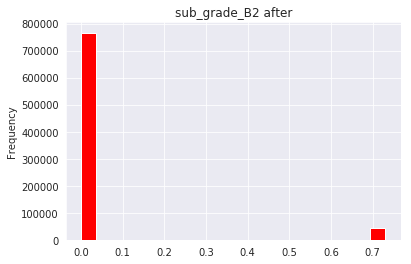

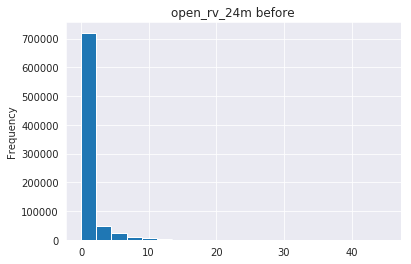

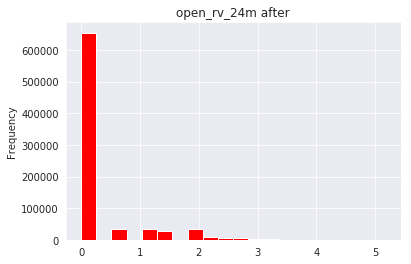

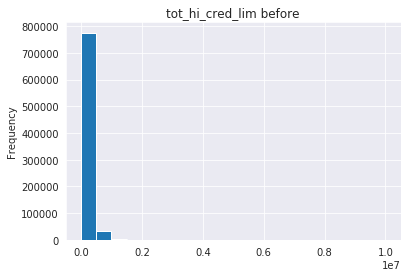

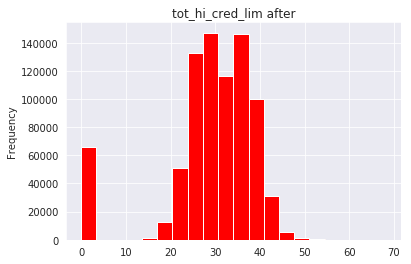

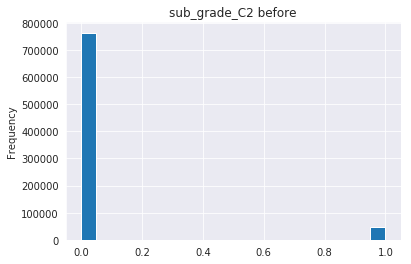

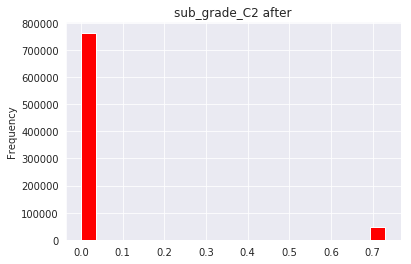

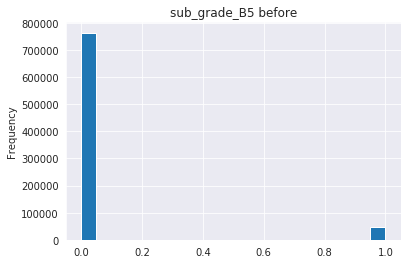

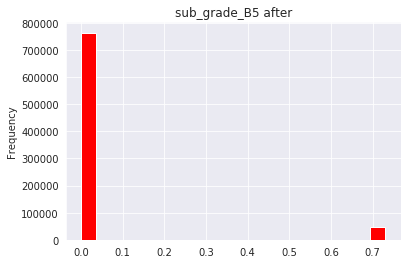

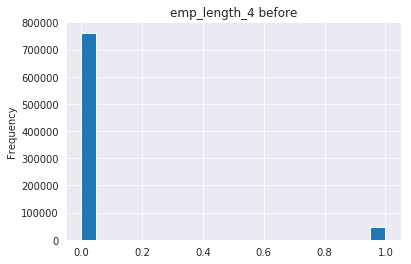

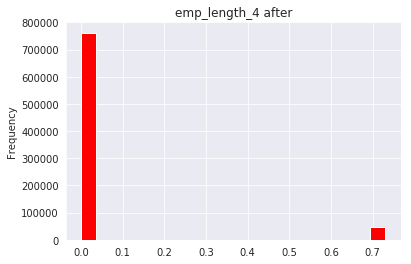

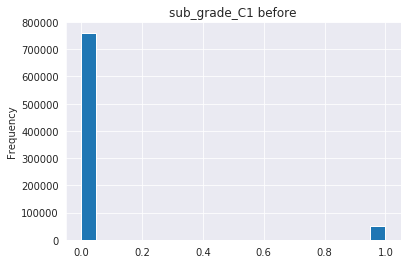

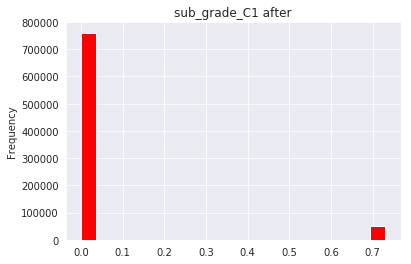

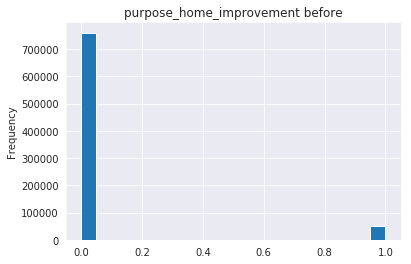

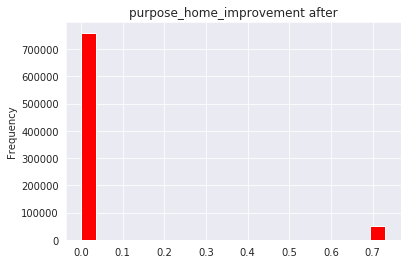

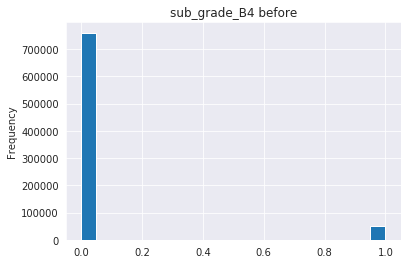

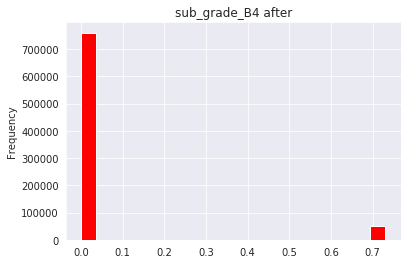

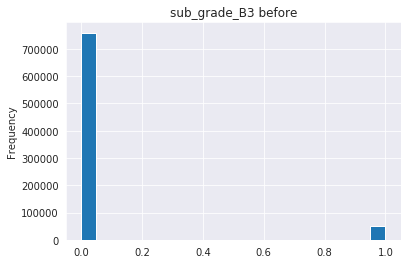

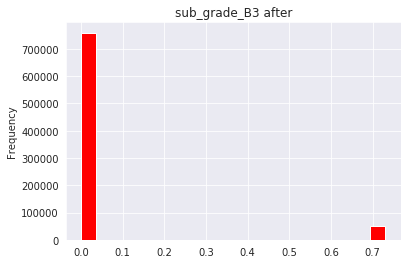

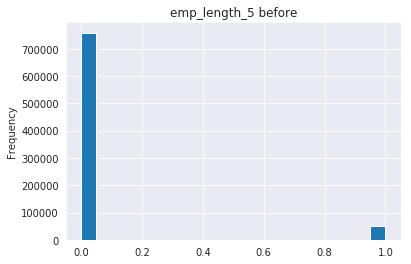

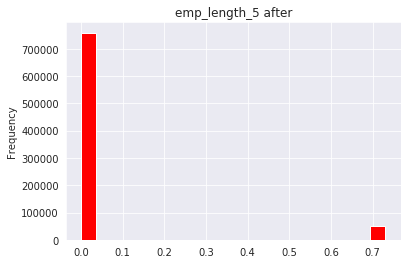

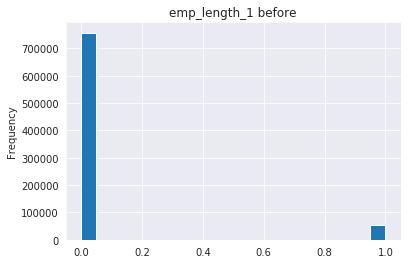

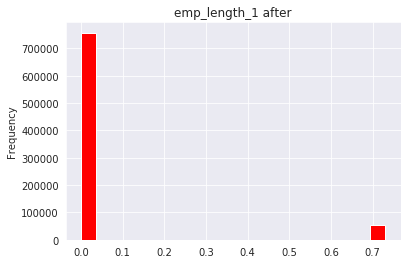

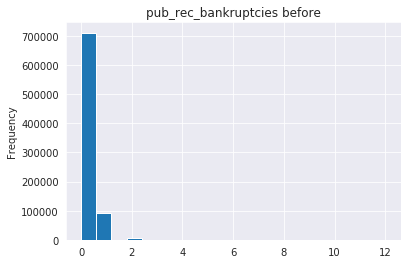

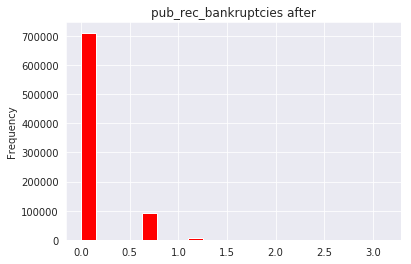

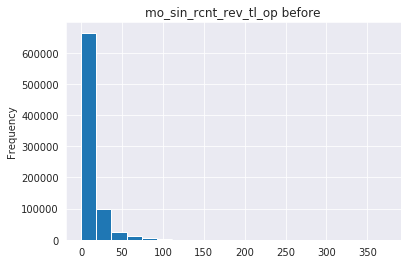

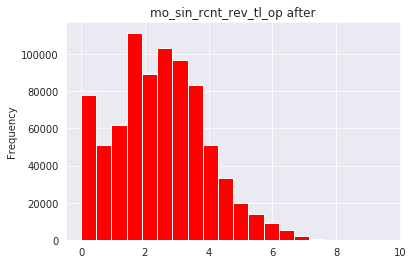

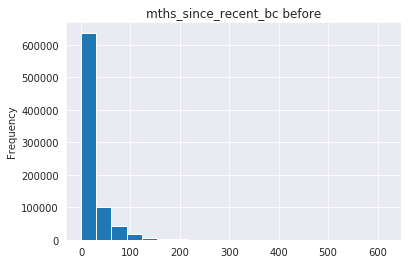

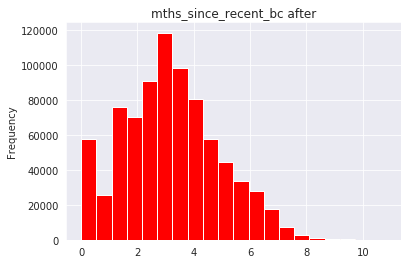

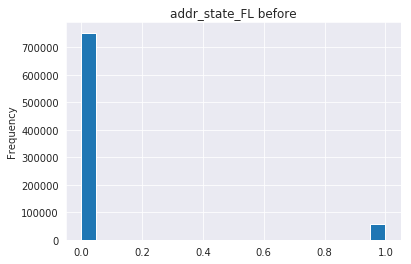

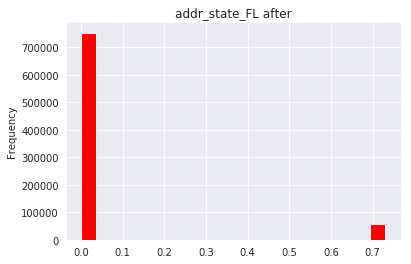

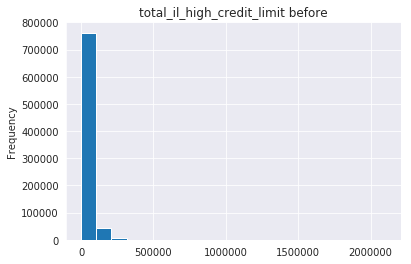

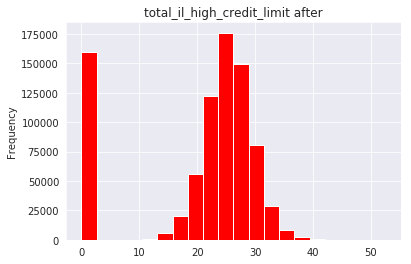

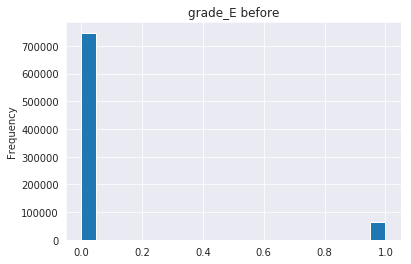

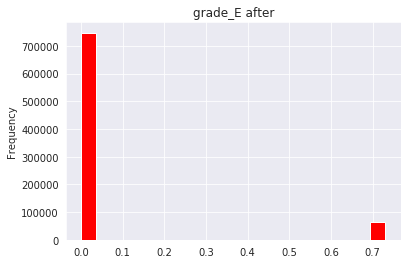

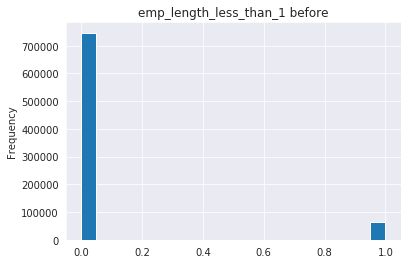

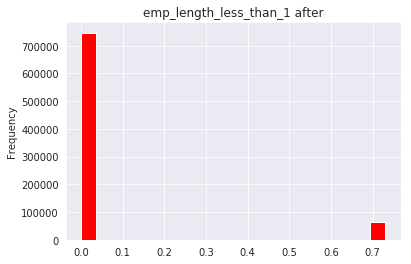

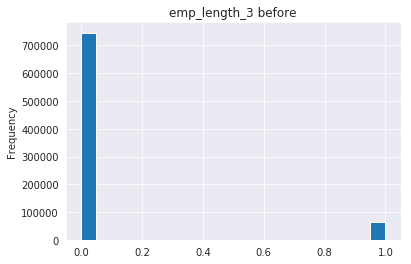

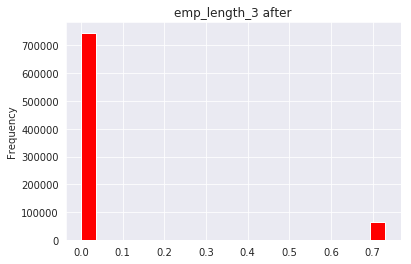

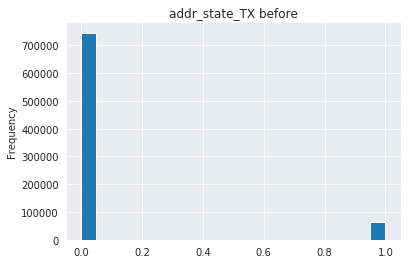

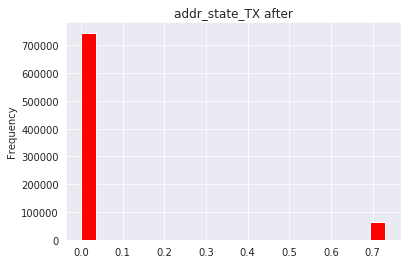

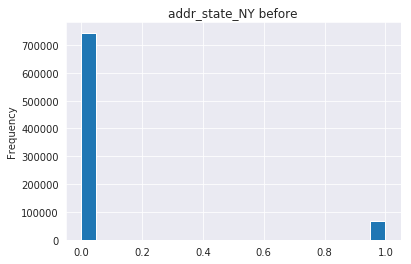

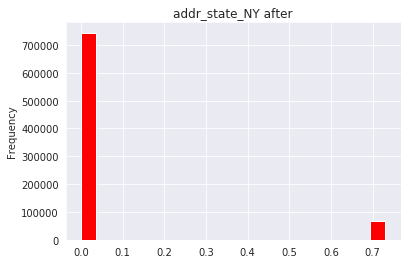

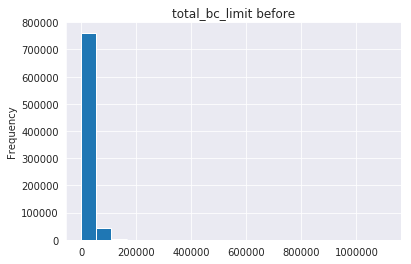

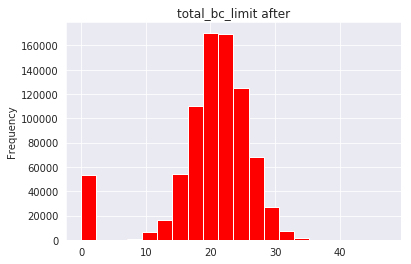

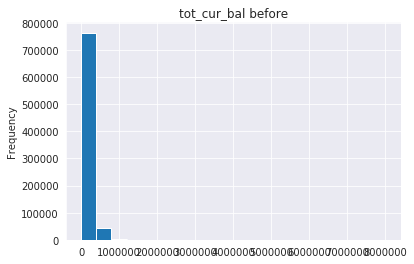

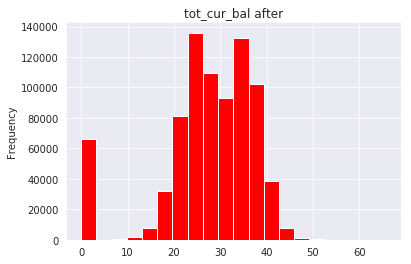

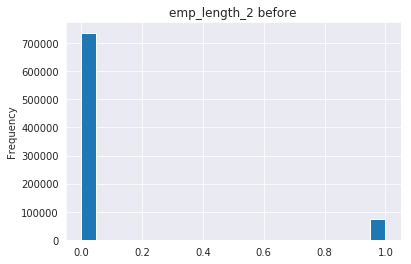

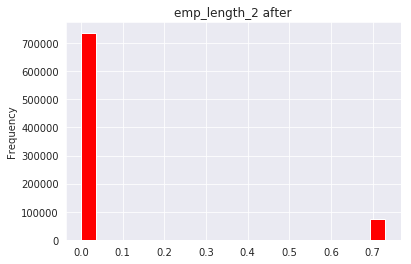

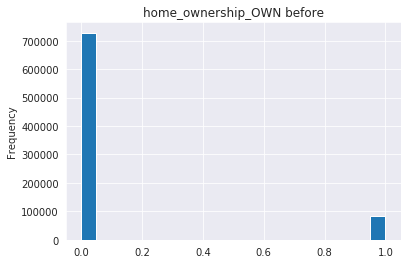

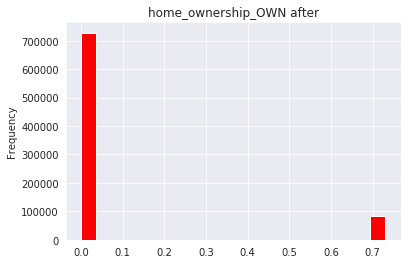

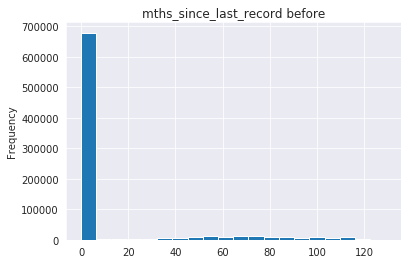

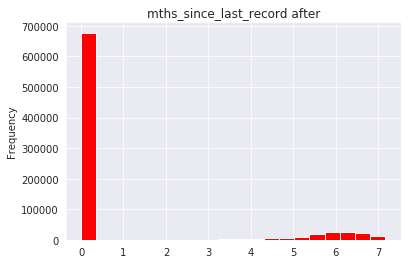

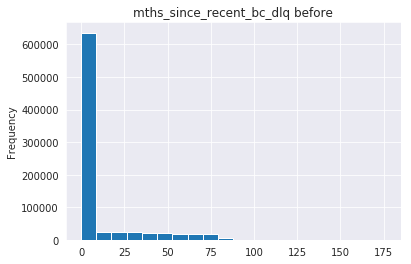

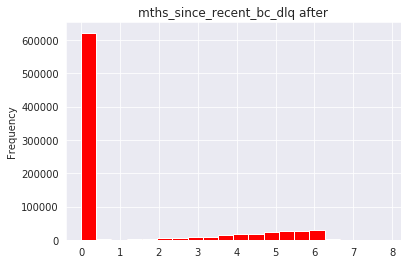

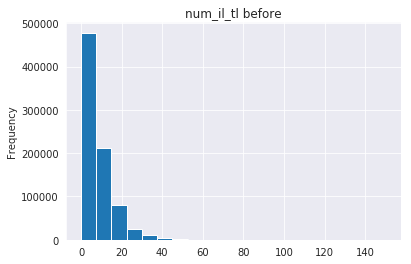

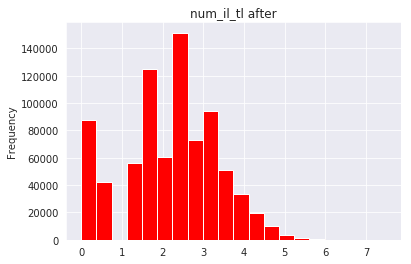

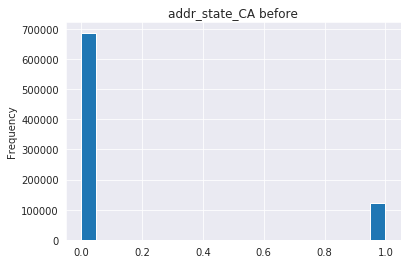

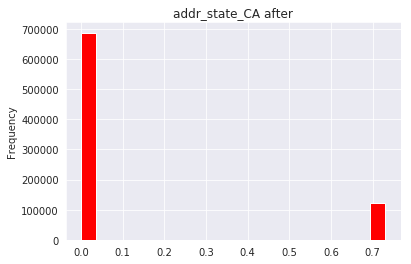

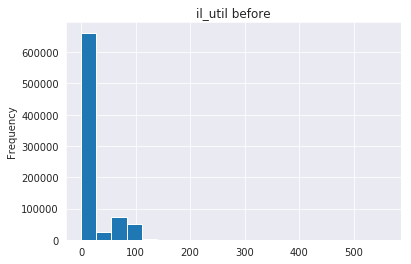

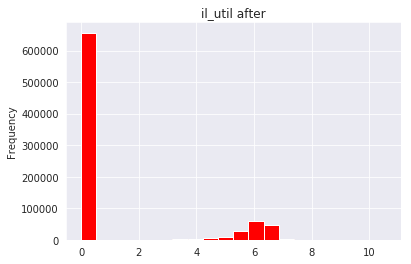

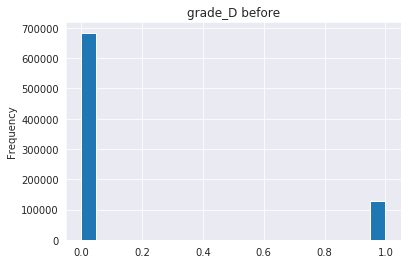

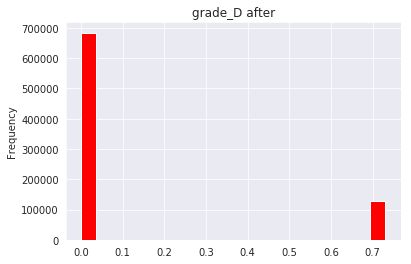

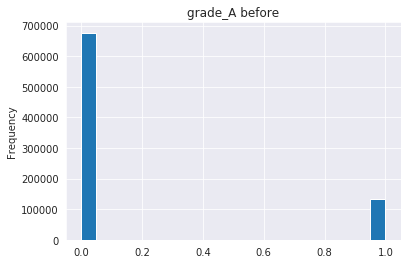

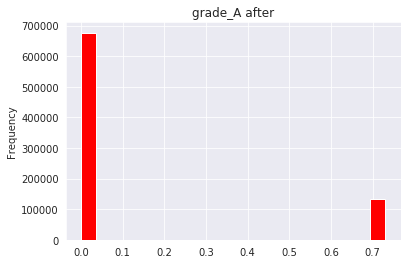

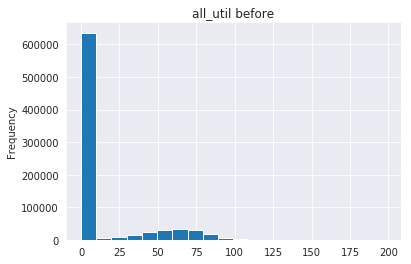

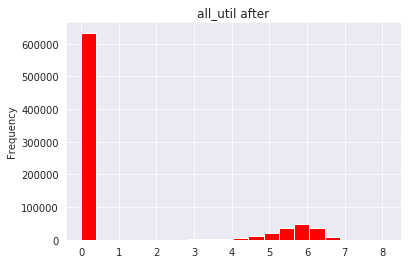

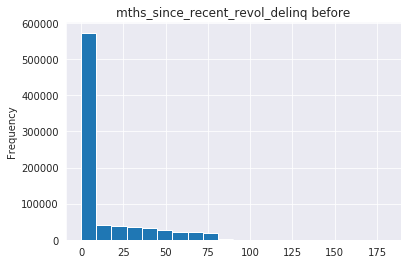

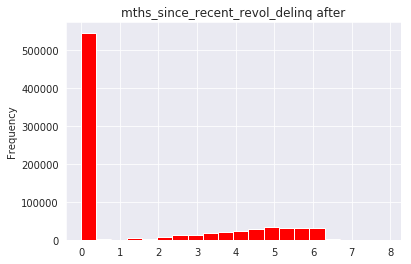

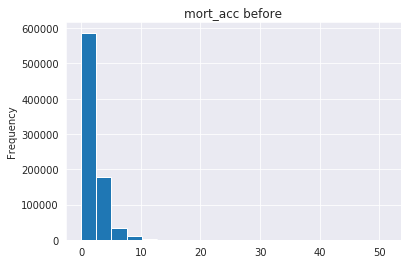

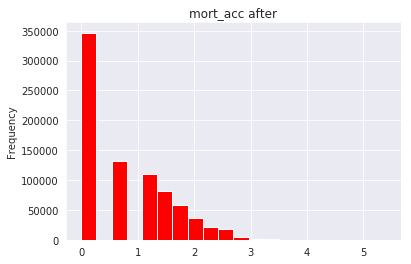

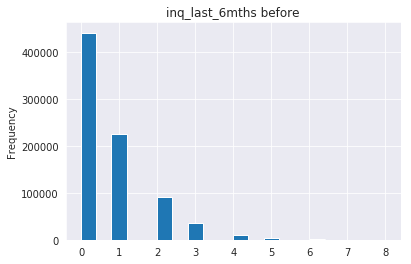

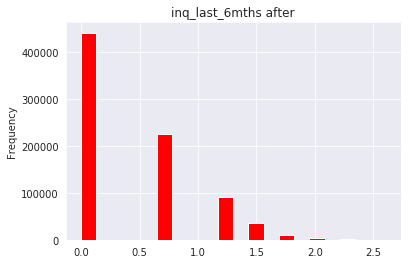

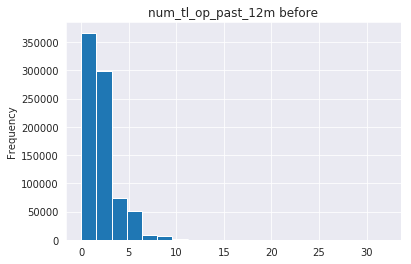

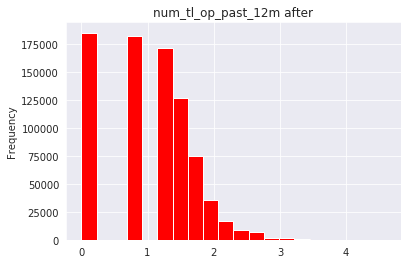

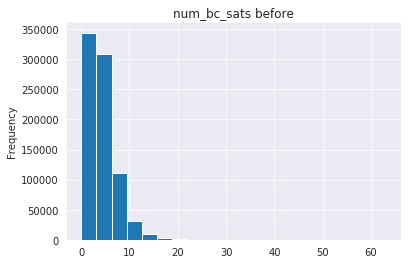

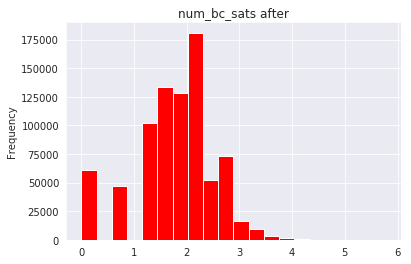

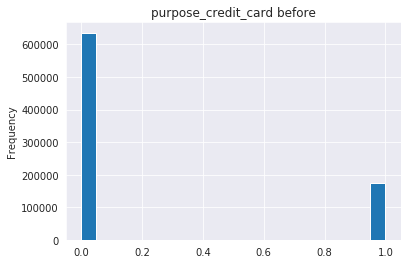

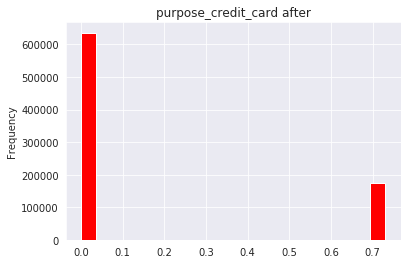

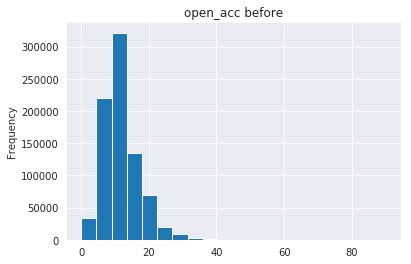

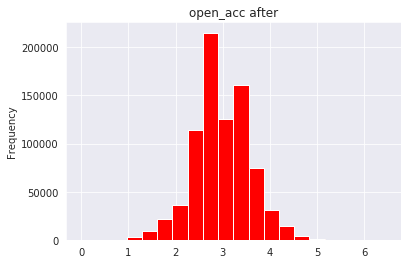

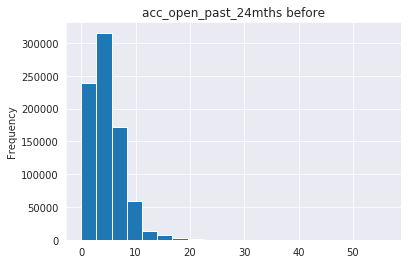

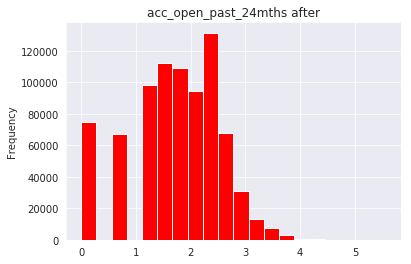

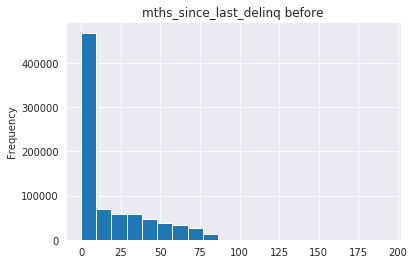

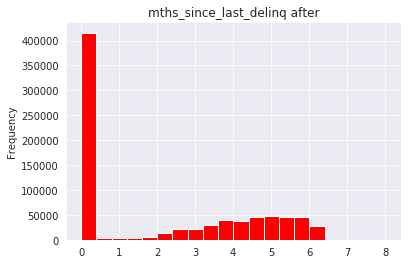

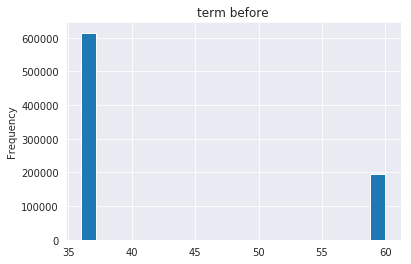

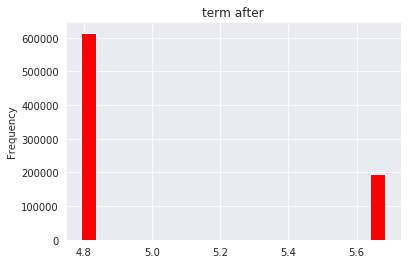

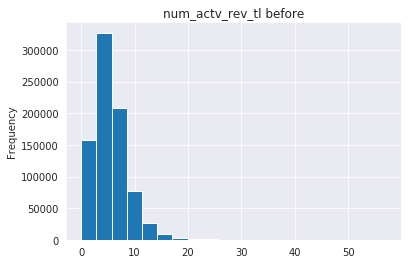

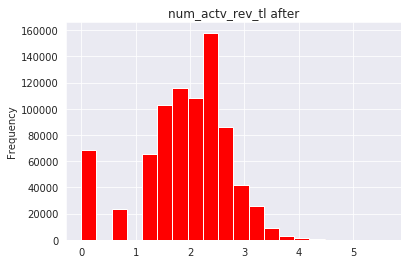

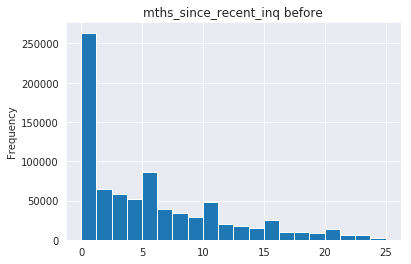

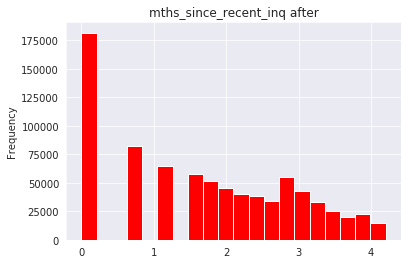

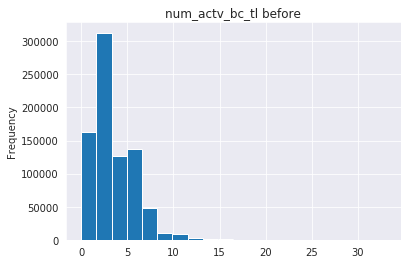

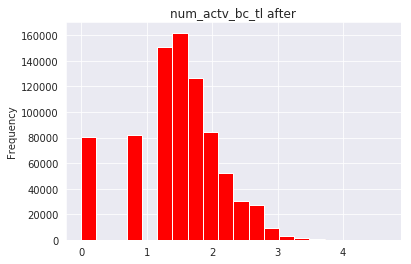

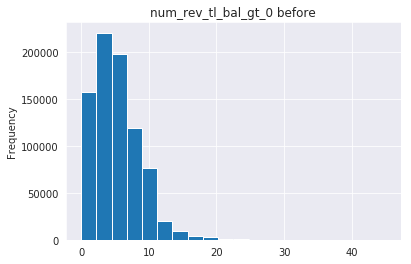

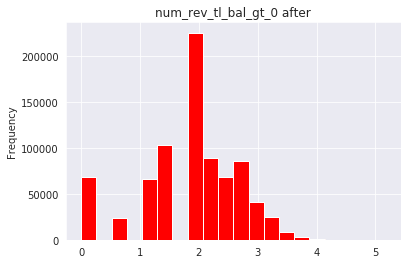

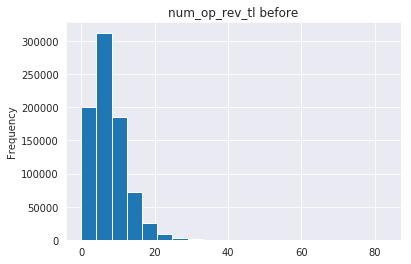

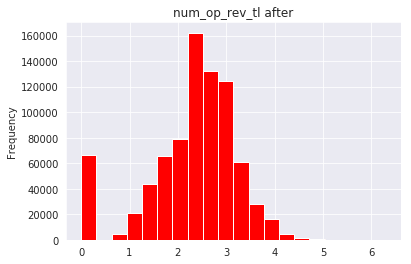

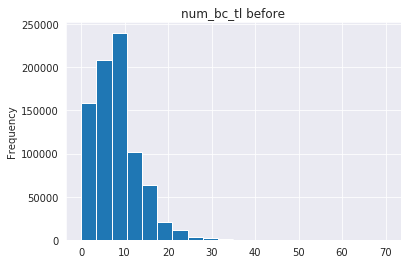

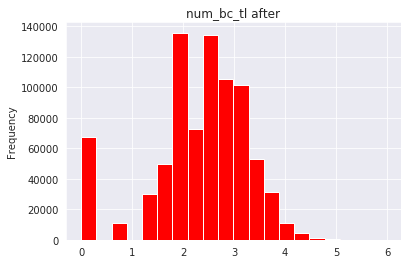

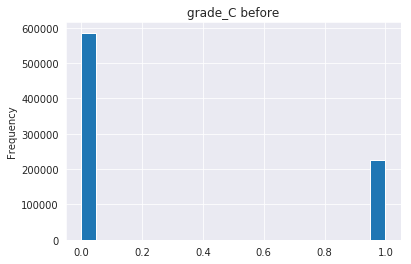

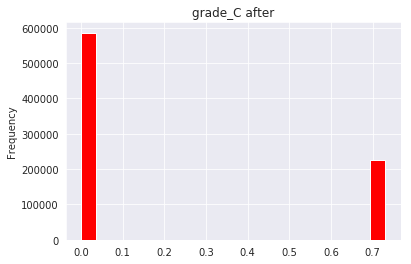

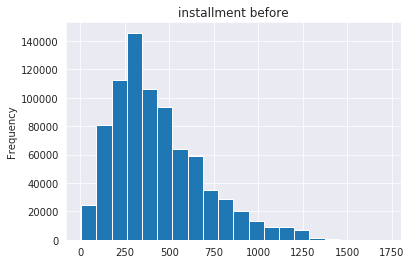

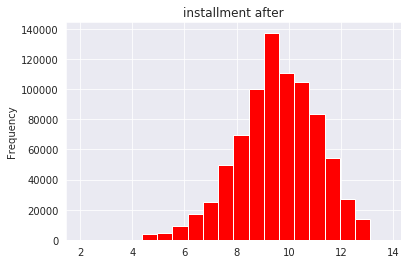

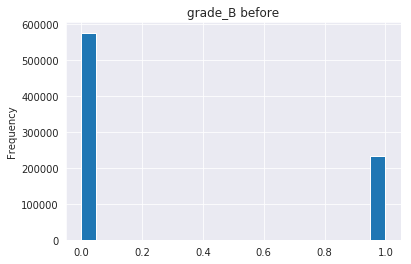

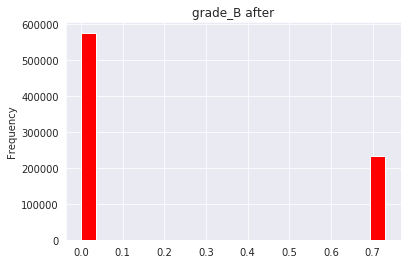

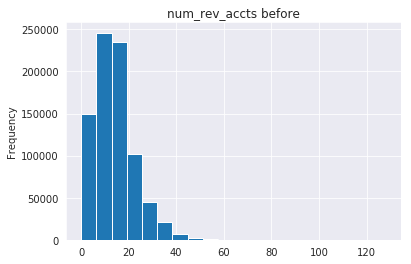

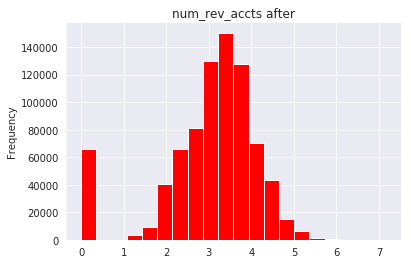

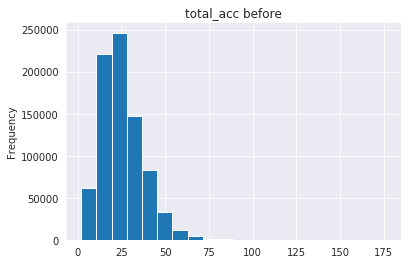

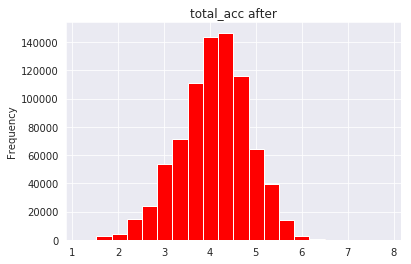

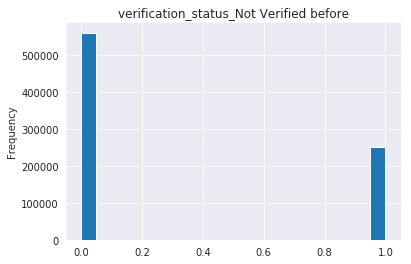

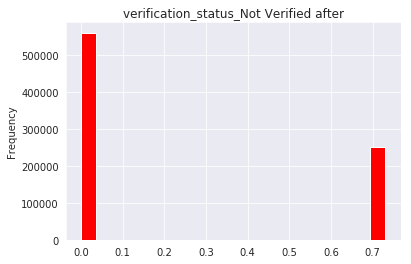

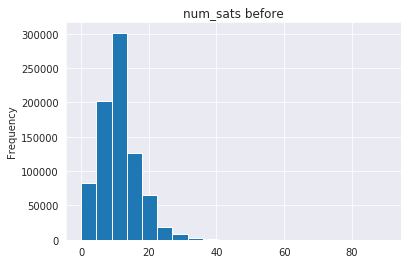

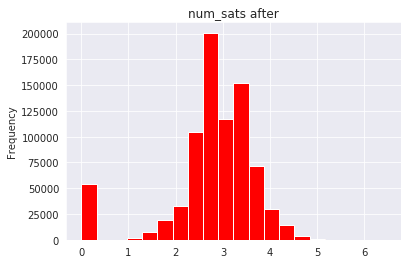

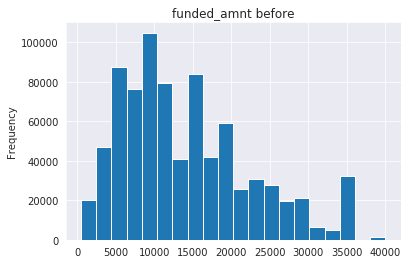

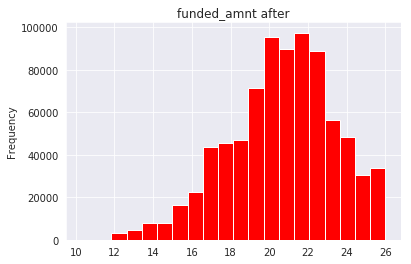

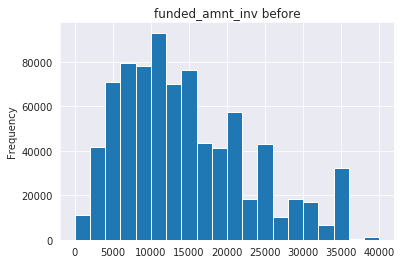

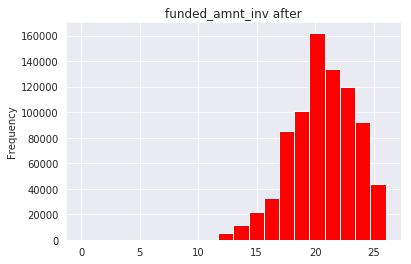

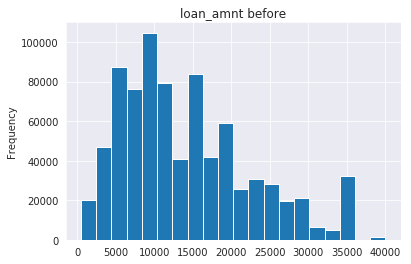

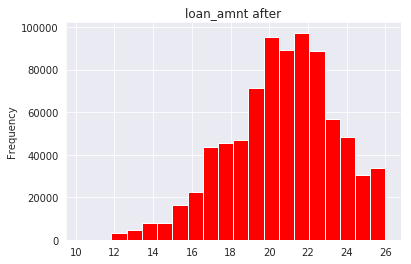

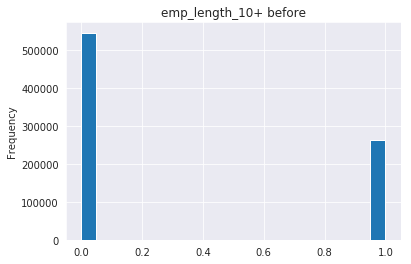

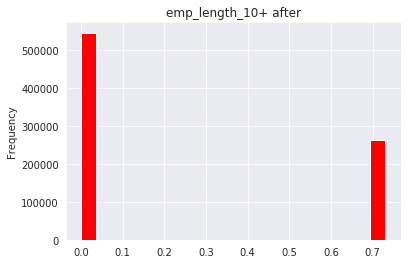

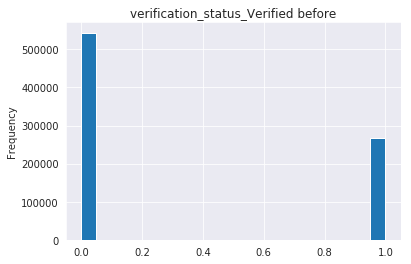

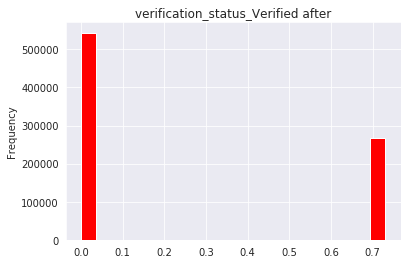

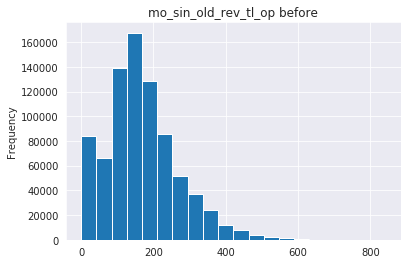

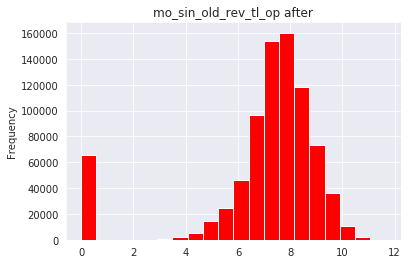

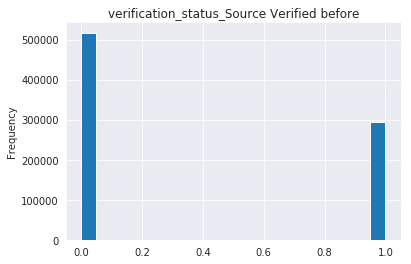

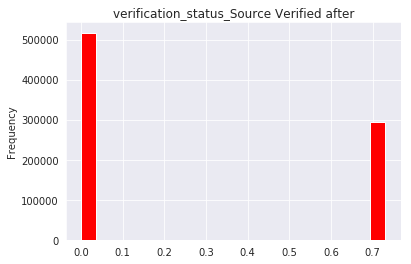

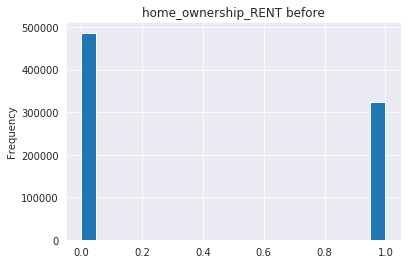

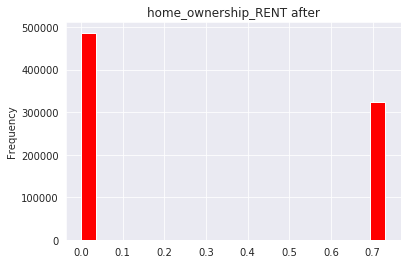

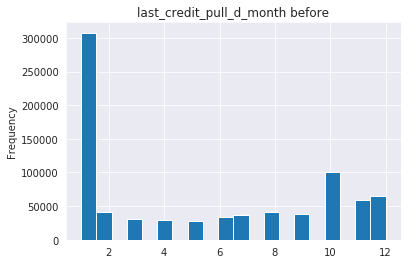

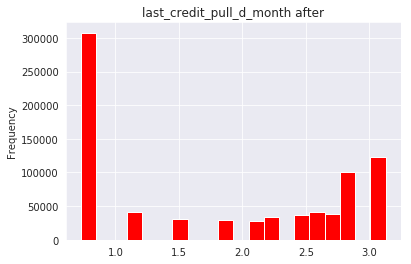

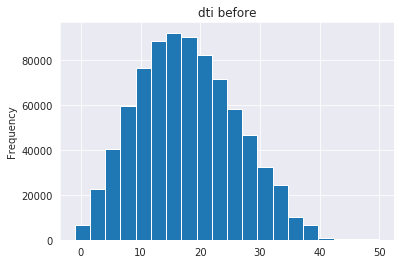

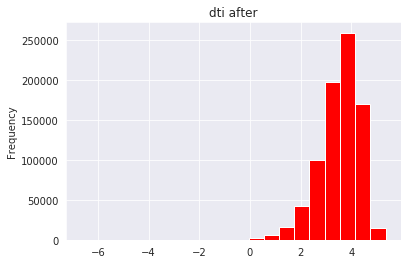

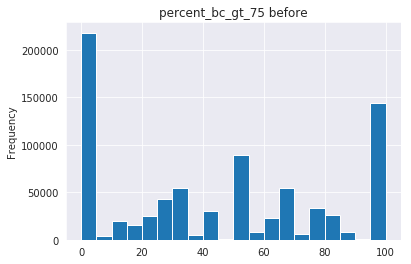

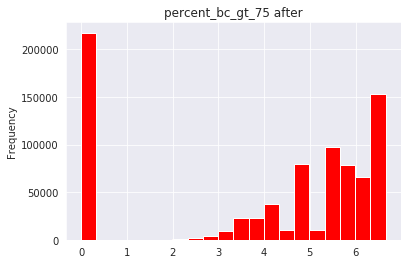

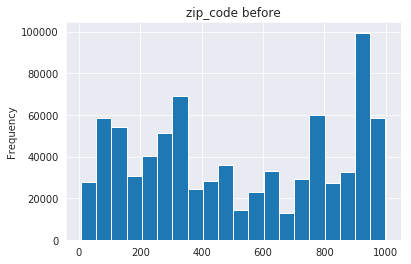

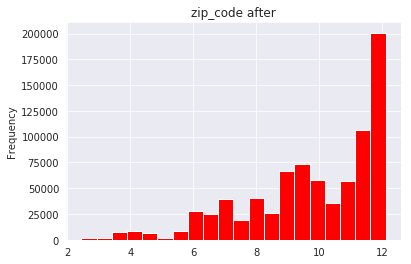

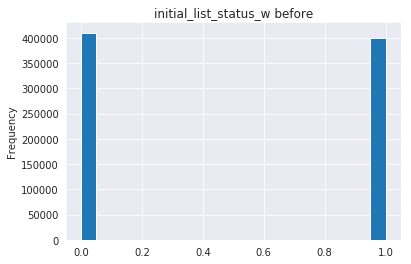

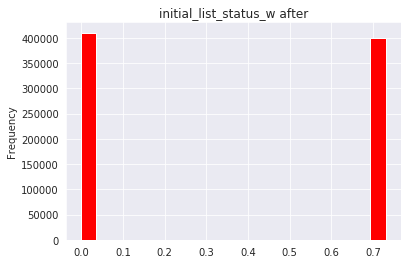

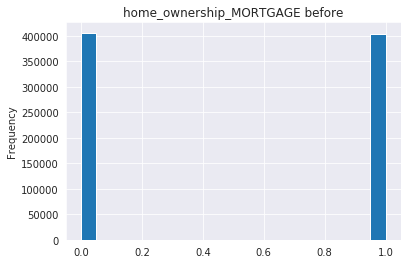

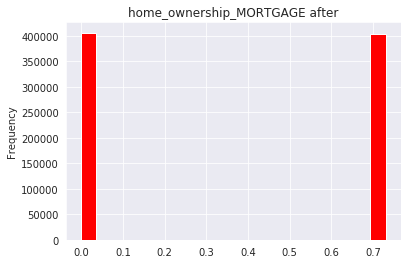

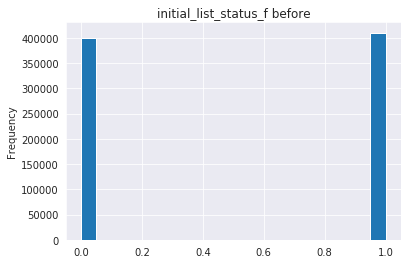

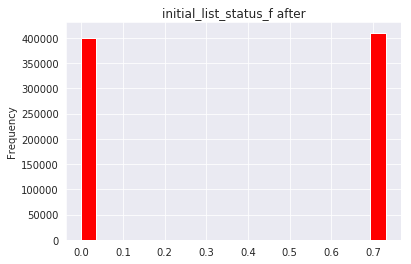

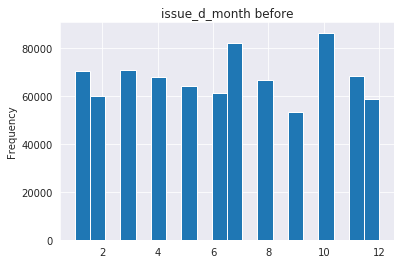

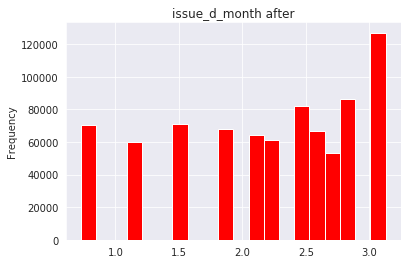

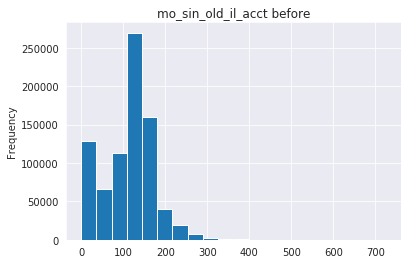

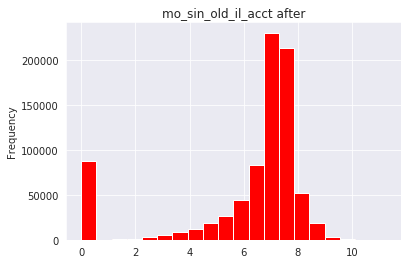

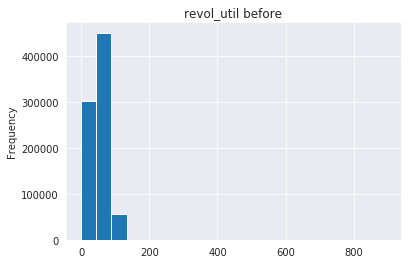

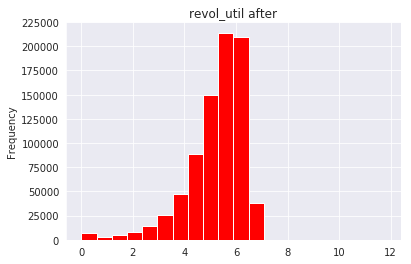

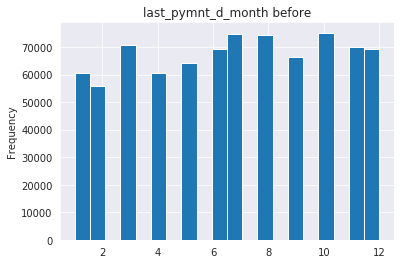

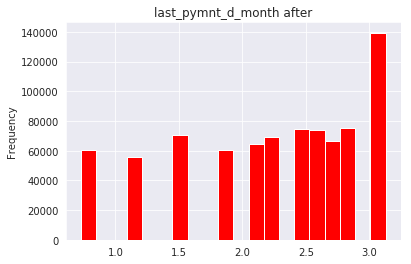

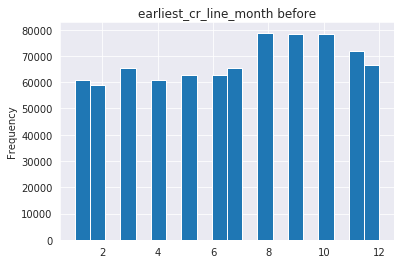

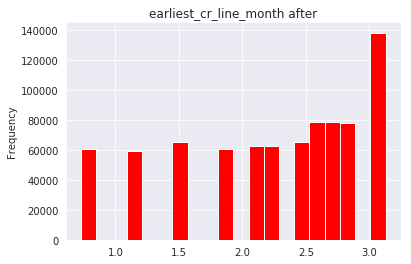

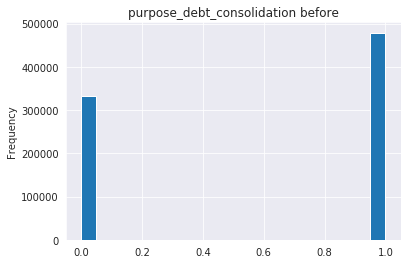

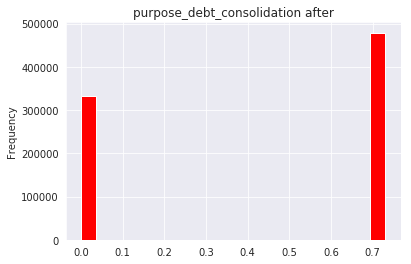

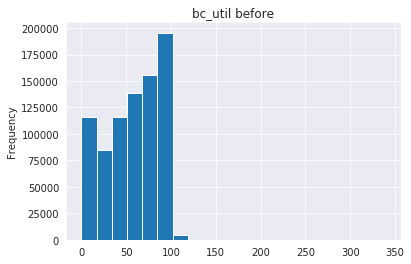

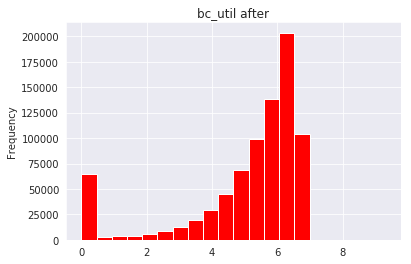

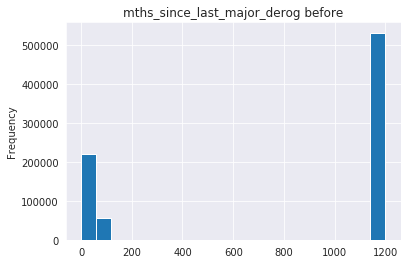

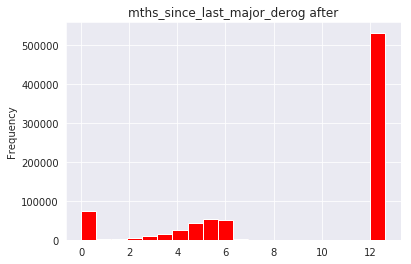

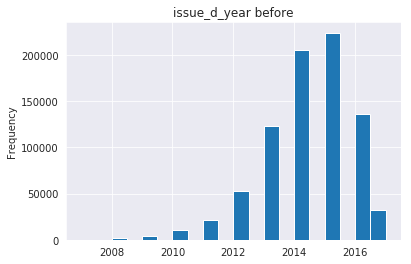

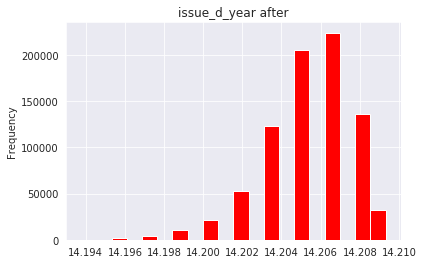

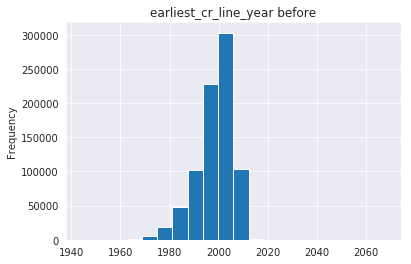

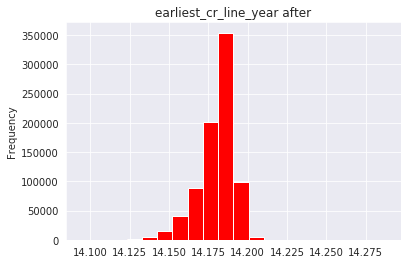

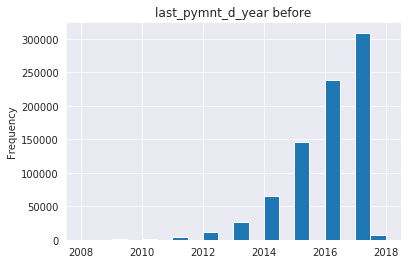

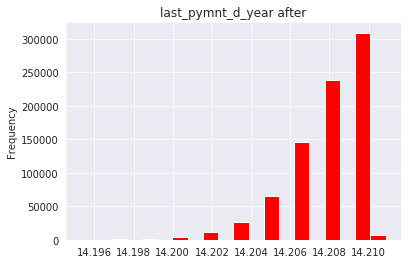

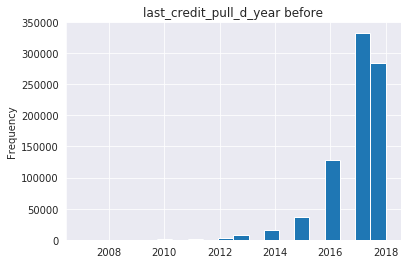

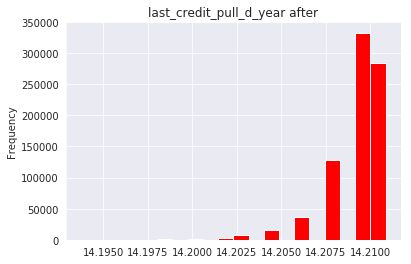

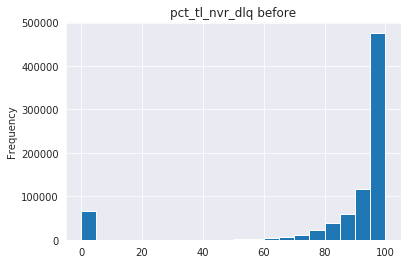

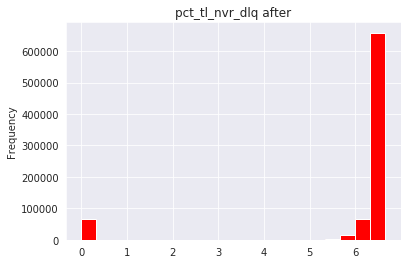

In [17]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    plt.figure()
    df[feat].plot.hist(bins=20, title=feat+' before')
    plt.show()
    df[feat] = boxcox1p(df[feat], lam)
    plt.figure()
    df[feat].plot.hist(bins=20, title=feat+' after', color='red')
    plt.show()

In [18]:
df = pd.get_dummies(df)
print(df.shape)
df

(810576, 209)


loan_amnt  funded_amnt  funded_amnt_inv      term  installment  \
186078  23.366548    23.366548        23.366548  4.792130    11.628822   
135302  20.744483    20.744483        20.744483  4.792130     9.677223   
341286  22.732127    22.732127        22.732127  5.684507    10.549874   
350165  23.598505    23.598505        23.598505  5.684507    10.892383   
187014  19.447199    19.447199        19.447199  4.792130     8.871835   
538527  20.610004    20.610004        20.610004  4.792130    10.122975   
741800  20.939446    20.939446        20.939446  4.792130     9.919346   
602208  20.931477    20.931477        20.931477  5.684507     9.373306   
424499  16.799462    16.799462        16.799462  4.792130     7.498011   
686437  12.125370    12.125370        12.125370  4.792130     4.800937   
645225  23.784389    23.784389        23.784389  4.792130    11.446510   
117499  19.565674    19.565674        19.565674  4.792130     9.119391   
201627  16.636323    16.636323        16.636323  4.792130     7.237792   
34662   16.636323    16.636323        16.636323  4.792130     7.298502   
406191  21.126905    21.126905        21.126905  4.792130    10.027110   
798824  20.182347    20.182347        20.182347  4.792130     9.258118   
645556  17.598037    17.598037        17.598037  4.792130     7.997975   
585536  23.784389    23.784389        23.766088  4.792130    11.569316   
5537    23.206076    23.206076        23.206076  4.792130    11.358234   
518526  21.538377    21.538377        21.538377  4.792130    10.443310   
175329  19.874209    19.874209        19.854263  4.792130     9.237100   
615882  14.892193    14.892193        14.892193  4.792130     6.391774   
85859   21.944481    21.944481        21.944481  4.792130    10.456074   
760218  17.253669    17.253669        17.253669  4.792130     7.867655   
483141  20.610004    20.610004        20.610004  5.684507     8.975940   
420262  23.598505    23.598505        23.598505  4.792130    11.399053   
692593  18.491718    18.491718        18.491718  4.792130     8.288685   
8385    21.366208    21.366208        21.366208  4.792130    10.213820   
738620  19.874209    19.874209        19.874209  5.684507     8.277672   
383220  23.598505    23.598505        23.598505  5.684507    10.984651   
...           ...          ...              ...       ...          ...   
232665  18.740670    18.740670        18.715108  4.792130     8.814423   
26897   24.925645    24.925645        24.925645  4.792130    12.535372   
543609  16.007825    16.007825        16.007825  4.792130     6.946820   
158399  24.581490    24.581490        24.581490  5.684507    11.305337   
316806  22.320331    22.320331        22.320331  5.684507    10.204807   
415640  25.360669    25.360669        25.360669  4.792130    12.794309   
57179   20.116641    20.116641        20.116641  4.792130     9.535736   
486565  24.306440    24.306440        24.306440  4.792130    11.976070   
23275   22.647824    22.647824        22.647824  4.792130    10.957832   
336459  23.659628    23.659628        23.659628  5.684507    10.231095   
764111  19.874209    19.874209        19.844258  4.792130     9.210221   
448384  18.368746    18.368746        18.368746  4.792130     8.389753   
319603  21.538377    21.538377        21.538377  4.792130    10.088920   
308233  21.812732    21.812732        21.812732  4.792130    10.213302   
144942  22.320331    22.320331        22.320331  4.792130    10.992311   
556940  19.501428    19.501428        19.501428  4.792130     9.210440   
276007  20.610004    20.610004        20.610004  4.792130     9.881273   
242183  24.628632    24.628632        24.628632  5.684507    10.898788   
627099  23.405917    23.405917        23.405917  4.792130    11.291310   
670738  24.628632    24.628632        24.628632  5.684507    11.139523   
709360  21.538377    21.538377        21.538377  5.684507     9.052042   
39571   20.610004    20.610004        20.610004  4.792130     9.597247   
732702  14.7

In [19]:
"""
cant_plot_list = []
for y in df.columns:
    print(y)
    try:
        plt.figure()
        df[y].plot.hist(bins=20, title=y)
        plt.show()
    except:
        cant_plot_list.append(y)
        # df.groupby(y).size().plot(kind='bar', title=y)
        # plt.show()
        # df = df.join(pd.get_dummies(df[y], prefix=y))
        # df.drop(y, axis=1, inplace=True)
        # plt.show()
"""

"\ncant_plot_list = []\nfor y in df.columns:\n    print(y)\n    try:\n        plt.figure()\n        df[y].plot.hist(bins=20, title=y)\n        plt.show()\n    except:\n        cant_plot_list.append(y)\n        # df.groupby(y).size().plot(kind='bar', title=y)\n        # plt.show()\n        # df = df.join(pd.get_dummies(df[y], prefix=y))\n        # df.drop(y, axis=1, inplace=True)\n        # plt.show()\n"

In [20]:
# Produce a scatter matrix for each pair of features in the data
# pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Check skew again
# check_skewness('loan_status')

In [21]:
# Running corr() function to see how the features are correlated.
df.corr()

loan_amnt  funded_amnt  funded_amnt_inv  \
loan_amnt                     1.000000     0.999487         0.990966   
funded_amnt                   0.999487     1.000000         0.991957   
funded_amnt_inv               0.990966     0.991957         1.000000   
term                          0.391137     0.390182         0.388525   
installment                   0.973912     0.974752         0.966746   
annual_inc                    0.477073     0.476897         0.472964   
zip_code                     -0.009637    -0.009513        -0.008905   
dti                           0.056945     0.057633         0.061403   
delinq_2yrs                   0.004067     0.004375         0.005195   
inq_last_6mths               -0.019450    -0.019693        -0.021574   
mths_since_last_delinq       -0.014339    -0.013899        -0.012674   
mths_since_last_record       -0.091527    -0.091163        -0.088679   
open_acc                      0.211369     0.211766         0.211919   
pub_rec                      -0.083894    -0.083507        -0.080986   
revol_bal                     0.416755     0.416704         0.414126   
revol_util                    0.115182     0.115613         0.117195   
total_acc                     0.233852     0.233843         0.233727   
collections_12_mths_ex_med   -0.014185    -0.014036        -0.013229   
mths_since_last_major_derog   0.066309     0.069052         0.080724   
acc_now_delinq                0.002956     0.003047         0.003400   
tot_coll_amt                 -0.056389    -0.055919        -0.053206   
tot_cur_bal                   0.259376     0.263039         0.276043   
open_acc_6m                  -0.010832    -0.010340        -0.008080   
open_act_il                   0.008081     0.008676         0.011179   
open_il_12m                  -0.007937    -0.007478        -0.005385   
open_il_24m                   0.001434     0.001998         0.004440   
mths_since_rcnt_il           -0.001421    -0.000787         0.002002   
total_bal_il                  0.017701     0.018362         0.021043   
il_util                      -0.007373    -0.006727        -0.003822   
open_rv_12m                  -0.013603    -0.013086        -0.010686   
...                                ...          ...              ...   
addr_state_MN                -0.005758    -0.005778        -0.005509   
addr_state_MO                -0.006554    -0.006557        -0.006329   
addr_state_MS                -0.001378    -0.001316        -0.001237   
addr_state_MT                -0.005536    -0.005503        -0.005298   
addr_state_NC                -0.005873    -0.005826        -0.005528   
addr_state_ND                 0.001469     0.001507         0.001649   
addr_state_NE                -0.004693    -0.004639        -0.004683   
addr_state_NH                 0.000110     0.000064         0.000045   
addr_state_NJ                 0.014971     0.014775         0.014208   
addr_state_NM                -0.000477    -0.000491        -0.000634   
addr_state_NV                -0.010184    -0.010163        -0.009745   
addr_state_NY                -0.003330    -0.003392        -0.003780   
addr_state_OH                -0.014698    -0.014639        -0.014339   
addr_state_OK                -0.001996    -0.001955        -0.001753   
addr_state_OR                -0.011384    -0.011422        -0.011187   
addr_state_PA                -0.008869    -0.008861        -0.008475   
addr_state_RI                -0.004561    -0.004617        -0.004486   
addr_state_SC                -0.003372    -0.003368        -0.003396   
addr_state_SD                -0.004438    -0.004417        -0.004250   
addr_state_TN                -0.002836    -0.002709        -0.002332   
addr_state_TX                 0.026143     0.026184         0.026117   
addr_state_UT                 0.000406     0.000440         0.000363   
addr_state_VA                 0.012994     0.012995         0.012389   
addr_state_VT                -0.005614    -0.005576        -0.005470 

In [22]:
# Histogram
# for y in df.columns:
    # plt.figure()
    # df[y].plot.hist(bins=20, title=y)
    # plt.show()

In [23]:
"""
# Split the data in features and target label
loan_status_raw = df['loan_status']
loan_status = loan_status_raw.apply(lambda x: int(x > 0.1))
features = df.drop('loan_status', axis=1)
"""
features = df

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score

# Split the features and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    print(learner)
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

"""
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, features, loan_status, cv=k_fold))
    

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
print(cross_val_score(clf, features, loan_status, cv=k_fold))
"""

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 648460 samples.
Testing set has 162116 samples.


'\nfrom sklearn.naive_bayes import GaussianNB\nclf = GaussianNB()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nfrom sklearn.tree import DecisionTreeClassifier\nclf = DecisionTreeClassifier()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = GaussianNB()\nprint(cross_val_score(clf, features, loan_status, cv=k_fold))\n    \n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = DecisionTreeClassifier()\nprint(cross_val_score(clf, features, loan_status, cv=k_fold))\n'

In [24]:
"""
from sklearn.svm import LinearSVC
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced

RANDOM_STATE = 42

pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE), LinearSVC(random_state=RANDOM_STATE))

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
"""

'\nfrom sklearn.svm import LinearSVC\nfrom imblearn import over_sampling as os\nfrom imblearn import pipeline as pl\nfrom imblearn.metrics import classification_report_imbalanced\n\nRANDOM_STATE = 42\n\npipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE), LinearSVC(random_state=RANDOM_STATE))\n\n# Train the classifier with balancing\npipeline.fit(X_train, y_train)\n\n# Test the classifier and get the prediction\ny_pred_bal = pipeline.predict(X_test)\n\n# Show the classification report\nprint(classification_report_imbalanced(y_test, y_pred_bal))\n'

In [25]:
"""
accuracy_score(y_test, y_pred_bal)
"""

'\naccuracy_score(y_test, y_pred_bal)\n'

In [26]:
## https://github.com/anilrajgr/udacity-machine-learning/blob/master/projects/customer_segments/customer_segments.ipynb
# Apply PCA by fitting the data with the same number of dimensions as features
from sklearn import decomposition

# from vpython import *

pca = decomposition.PCA(n_components=10)
pca.fit(features)
df_pca = pca.transform(features)

# Generate PCA results plot
# pca_results = vs.pca_results(features, pca)

# print(pca_results['Explained Variance'].cumsum())

In [27]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.50587555 0.1630238  0.08389482 0.05679292 0.03281107 0.02569087
 0.01909594 0.0160326  0.0144064  0.01120165]
[0.50587555 0.66889935 0.75279417 0.80958709 0.84239816 0.86808903
 0.88718497 0.90321757 0.91762397 0.92882562]
[19136.8513235  10863.60949826  7793.20720193  6412.03279423
  4873.70025424  4312.5884568   3718.0836497   3406.83131865
  3229.43372961  2847.67013513]


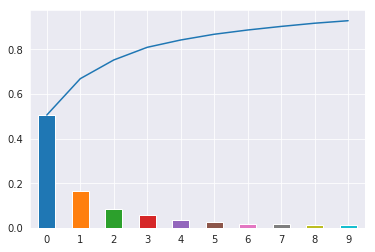

In [28]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot()

In [29]:
df_pca

array([[ -4.262414  ,  -4.71659245,  -6.51163093, ...,  -1.20166928,
          0.72635719,  -7.37890255],
       [  9.77362762, -12.41316799,  20.48642699, ...,   1.01203657,
         -3.3830015 ,   3.6292688 ],
       [ 14.9018713 ,  -7.8845405 , -10.82805198, ...,   7.47382338,
          0.18600105,  -0.98137254],
       ...,
       [  2.77647335,  -7.11646583,   9.47668636, ...,  -3.85088307,
          3.36574959,  -0.45411631],
       [  5.70687571,  24.79882662,   3.08149684, ...,  -2.67605847,
          1.17041361,   0.87214038],
       [ -3.97507757,  -5.75612167,  -1.67402814, ...,  -1.38572174,
          2.20238936,  -0.76968036]])

In [30]:
# Split the features (df_pca) and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
    

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))

Training set has 648460 samples.
Testing set has 162116 samples.
GaussianNB(priors=None)
GaussianNB trained on 648460 samples.
{'train_time': 0.17363286018371582, 'pred_time': 0.16466712951660156, 'acc_train': 0.7947783980507664, 'acc_test': 0.7942337585432653, 'f_train': 0.8289975172719215, 'f_test': 0.8285950830352613}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 18.589658975601196, 'pred_time': 0.35524678230285645, 'acc_train': 1.0, 'acc_test': 0.6769597078635051, 'f_train': 1.0, 'f_test': 0.7997882193036523}
[0.79423376 0.79390556 0.79300497 0.79644697 0.79574993]
[0.67659577 0.67613731 0.67732165 0.67807421 0.67888844

In [31]:
"""
for pca_comp in range(1,26):
    print("PCA component size: " + str(pca_comp))
    pca = decomposition.PCA(n_components=pca_comp)
    pca.fit(features)
    df_pca = pca.transform(features)
    X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)
    
    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
    clf = GaussianNB()
    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
    
    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
    clf = DecisionTreeClassifier()
    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
"""

'\nfor pca_comp in range(1,26):\n    print("PCA component size: " + str(pca_comp))\n    pca = decomposition.PCA(n_components=pca_comp)\n    pca.fit(features)\n    df_pca = pca.transform(features)\n    X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)\n    \n    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\n    clf = GaussianNB()\n    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n    \n    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\n    clf = DecisionTreeClassifier()\n    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n'

In [32]:
print(df_pca.shape)
print(df.shape)
# features = features[0:95]
# loan_status = loan_status[0:95]
print(features.shape)
print(loan_status.shape)

(810576, 10)
(810576, 209)
(810576, 209)
(810576,)


In [33]:
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced
from sklearn.svm import LinearSVC
RANDOM_STATE=42

pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
            LinearSVC(random_state=RANDOM_STATE))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, random_state=RANDOM_STATE)

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
print(fbeta_score(y_test, y_pred_bal, beta=0.5))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.46      0.04      0.99      0.08      0.21      0.04     41579
          1       0.80      0.99      0.04      0.88      0.21      0.05    161065

avg / total       0.73      0.79      0.24      0.72      0.21      0.05    202644

0.831356218675335


In [34]:
## From http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier


names = ["XGBoost", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
# names = ["Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

"""
"Linear SVM", "RBF SVM", "Gaussian Process", "Nearest Neighbors",
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    KNeighborsClassifier(3),
 """    

classifiers = [XGBClassifier(), DecisionTreeClassifier(max_depth=5),
# classifiers = [DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

print("Original data")
print("=============")
print(features.shape)
for name, clf in zip(names, classifiers):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)
    result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
    print(result)
    print('-----------------------------------')
    
print("PCA data")
print("=============")
for pca_comp in [1, 5, 10, 25, 50, 100, 150]:
    print("PCA component size: " + str(pca_comp))
    pca = decomposition.PCA(n_components=pca_comp)
    pca.fit(features)
    features_pca = pca.transform(features)
    # print(features_pca)
    # features_pca =  StandardScaler().fit_transform(features_pca)
    # print(features_pca)
    # print(features_pca.shape)
    ###### StandardScalar
    for name, clf in zip(names, classifiers):
        X_train, X_test, y_train, y_test = train_test_split(features_pca, loan_status, test_size = 0.2, random_state = 0)
        result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
        print(result)
        print('-----------------------------------')

Original data
(810576, 209)
XGBoost


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 292.47673201560974, 'pred_time': 4.769803762435913, 'acc_train': 0.8470715233013602, 'acc_test': 0.8472883614202176, 'f_train': 0.8733110664668038, 'f_test': 0.873330992321666}
-----------------------------------
Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 12.25633192062378, 'pred_time': 0.3872411251068115, 'acc_train': 0.8076997810196466, 'acc_test': 0.8076747514125687, 'f_train': 0.8406645345524372, 'f_test': 0.8404867483973978}
-----------------------------------
Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained on 648460 samples.
{'train_time': 18.97083592414856, 'pred_time': 6.798405408859253, 'acc_train': 0.5294358942725843, 'acc_test': 0.5290964494559451, 'f_train': 0.7368328287304102, 'f_test': 0.7363646754205881}
-----------------------------------
PCA data
PCA component size: 1
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 13.472702741622925, 'pred_time': 2.1590843200683594, 'acc_train': 0.7949326095672825, 'acc_test': 0.7945545165190357, 'f_train': 0.828929908192204, 'f_test': 0.8286009824077482}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 0.6358742713928223, 'pred_time': 0.03475069999694824, 'acc_train': 0.7949572834099251, 'acc_test': 0.794511337560759, 'f_train': 0.8289506439272841, 'f_test': 0.8285858016638235}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, ma

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 34.644819021224976, 'pred_time': 2.302988290786743, 'acc_train': 0.7949326095672825, 'acc_test': 0.7945545165190357, 'f_train': 0.828929908192204, 'f_test': 0.8286009824077482}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 2.390922784805298, 'pred_time': 0.045792579650878906, 'acc_train': 0.7949326095672825, 'acc_test': 0.7945545165190357, 'f_train': 0.828929908192204, 'f_test': 0.8286009824077482}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 59.70249676704407, 'pred_time': 2.293095350265503, 'acc_train': 0.7949326095672825, 'acc_test': 0.7945545165190357, 'f_train': 0.828929908192204, 'f_test': 0.8286009824077482}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 4.834888935089111, 'pred_time': 0.057578086853027344, 'acc_train': 0.7949326095672825, 'acc_test': 0.7945545165190357, 'f_train': 0.828929908192204, 'f_test': 0.8286009824077482}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 132.8251507282257, 'pred_time': 2.5962421894073486, 'acc_train': 0.7950821947383031, 'acc_test': 0.7946100323225345, 'f_train': 0.8290790473573774, 'f_test': 0.828683387596999}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 12.19444751739502, 'pred_time': 0.07857680320739746, 'acc_train': 0.7949326095672825, 'acc_test': 0.7945545165190357, 'f_train': 0.828929908192204, 'f_test': 0.8286009824077482}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 255.75512290000916, 'pred_time': 2.791496753692627, 'acc_train': 0.7971671344416001, 'acc_test': 0.7965777591354339, 'f_train': 0.8311773884108559, 'f_test': 0.8307060853012909}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 24.74204444885254, 'pred_time': 0.10918879508972168, 'acc_train': 0.7949326095672825, 'acc_test': 0.7945545165190357, 'f_train': 0.828929908192204, 'f_test': 0.8286009824077482}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 498.0932297706604, 'pred_time': 3.0806896686553955, 'acc_train': 0.79937544335811, 'acc_test': 0.7987182017814405, 'f_train': 0.8341552302322383, 'f_test': 0.8337074047879407}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 51.65246295928955, 'pred_time': 0.21970343589782715, 'acc_train': 0.7955849242821454, 'acc_test': 0.7947519060425868, 'f_train': 0.8298304896714218, 'f_test': 0.8292483765521761}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 734.8186433315277, 'pred_time': 3.5042850971221924, 'acc_train': 0.7997393825370879, 'acc_test': 0.7991191492511535, 'f_train': 0.8341757375843952, 'f_test': 0.8337092009792548}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 73.60725498199463, 'pred_time': 0.3230149745941162, 'acc_train': 0.7951546741510656, 'acc_test': 0.7948752744948062, 'f_train': 0.8302826713121718, 'f_test': 0.830011054128989}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_

In [35]:
print("Original data after scaling")
print("=============")
print(features)
features =  StandardScaler().fit_transform(features)
print("After scaling")
print(features)
for name, clf in zip(names, classifiers):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)
    result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
    print(result)

Original data after scaling
        loan_amnt  funded_amnt  funded_amnt_inv      term  installment  \
186078  23.366548    23.366548        23.366548  4.792130    11.628822   
135302  20.744483    20.744483        20.744483  4.792130     9.677223   
341286  22.732127    22.732127        22.732127  5.684507    10.549874   
350165  23.598505    23.598505        23.598505  5.684507    10.892383   
187014  19.447199    19.447199        19.447199  4.792130     8.871835   
538527  20.610004    20.610004        20.610004  4.792130    10.122975   
741800  20.939446    20.939446        20.939446  4.792130     9.919346   
602208  20.931477    20.931477        20.931477  5.684507     9.373306   
424499  16.799462    16.799462        16.799462  4.792130     7.498011   
686437  12.125370    12.125370        12.125370  4.792130     4.800937   
645225  23.784389    23.784389        23.784389  4.792130    11.446510   
117499  19.565674    19.565674        19.565674  4.792130     9.119391   
201627  16

After scaling
[[ 1.00379085  1.0054951   1.00184063 ... -0.04733345  0.98827709
  -0.98827709]
 [ 0.03787744  0.03924106  0.04541681 ... -0.04733345 -1.01186196
   1.01186196]
 [ 0.77008344  0.77170527  0.77042927 ... -0.04733345 -1.01186196
   1.01186196]
 ...
 [ 0.20676505  0.20818823  0.21264519 ... -0.04733345  0.98827709
  -0.98827709]
 [-1.24806441 -1.24715427 -1.22789133 ... -0.04733345  0.98827709
  -0.98827709]
 [ 0.33033117  0.33179792  0.33499734 ... -0.04733345 -1.01186196
   1.01186196]]
XGBoost
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 290.6507740020752, 'pred_time': 3.714181900024414, 'acc_train': 0.8470715233013602, 'acc_test': 0.8472883614202176, 'f_train': 0.8733110664668038, 'f_test': 0.873330992321666}
Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 16.69309902191162, 'pred_time': 0.4287235736846924, 'acc_train': 0.8076997810196466, 'acc_test': 0.8076747514125687, 'f_train': 0.8406645345524372, 'f_test': 0.8404867483973978}
Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained on 648460 samples.
{'train_time': 18.864298820495605, 'pred_time': 6.778429269790649, 'acc_train': 0.36273632914906084, 'acc_test': 0.3626292284536998, 'f_train': 0.5586592178770949, 'f_test': 0.5581272239514093}


In [36]:
"""
print("More fine tuning")
    
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf = MLPClassifier()

## Note the features is already scaled
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

# TODO: Create the parameters list you wish to tune
parameters = {
    'hidden_layer_sizes' : [(100,), (50, 50), (100,50,3), (10, 50, 100), (10, 50, 100, 50, 10)],
    # 'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    # 'solver' : ['lbfgs', 'sgd', 'adam'],
    # 'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.00001, 1],
    # 'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    # 'learning_rate_init' : [0.001, 0.01, 0.1, 0.0001],
    # 'max_iter' : [200, 100, 50, 400],
    # 'warm_start' : [False, True],
    # 'momentum' : [0.9, 0.5, 0.8, 0.1],
    ### ------
    # nesterovs_momentum : boolean, default True
    # early_stopping : bool, default False
    # validation_fraction : float, optional, default 0.1
    # beta_1 : float, optional, default 0.9
    # beta_2 : float, optional, default 0.999
    # epsilon : float, optional, default 1e-8
    # n_iter_no_change : int, optional, default 10
    # 'power_t' : double, optional, default 0.5
    # 'batch_size' : int, optional, default ‘auto’
    # 'shuffle' : bool, optional, default True
    # random_state : int, RandomState instance or None, optional, default None
    # tol : float, optional, default 1e-4
    # verbose : bool, optional, default False
}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
"""

'\nprint("More fine tuning")\n    \n# TODO: Import \'GridSearchCV\', \'make_scorer\', and any other necessary libraries\nfrom sklearn.metrics import make_scorer\nfrom sklearn.model_selection import GridSearchCV\n\n# TODO: Initialize the classifier\nclf = MLPClassifier()\n\n## Note the features is already scaled\nX_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)\n\n# TODO: Create the parameters list you wish to tune\nparameters = {\n    \'hidden_layer_sizes\' : [(100,), (50, 50), (100,50,3), (10, 50, 100), (10, 50, 100, 50, 10)],\n    # \'activation\' : [\'identity\', \'logistic\', \'tanh\', \'relu\'],\n    # \'solver\' : [\'lbfgs\', \'sgd\', \'adam\'],\n    # \'alpha\' : [0.0001, 0.001, 0.01, 0.1, 0.00001, 1],\n    # \'learning_rate\' : [\'constant\', \'invscaling\', \'adaptive\'],\n    # \'learning_rate_init\' : [0.001, 0.01, 0.1, 0.0001],\n    # \'max_iter\' : [200, 100, 50, 400],\n    # \'warm_start\' : [False, True],\n    

In [37]:
# print(grid_fit.best_params_)